## 1.1 Import libraries 

In [156]:
import pandas as pd 
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

## 1.2 Import raw data from IMF

In [157]:
spain_raw = pd.read_excel('spain_data.xlsx', header=2)

# rename first column to 'date'
spain_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)  

spain_raw

,date,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
0,Jan 1960,NaN,60.000,233.000000,2.857368
1,Feb 1960,NaN,60.000,253.000000,2.855049
2,Mar 1960,NaN,60.000,299.000000,2.851573
3,Apr 1960,NaN,60.000,326.000000,2.853891
4,May 1960,NaN,60.000,360.000000,2.845198
...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576
368,Sep 1990,97.803577,98.467,53790.187718,52.750025
369,Oct 1990,100.909947,95.697,55428.040577,53.218335
370,Nov 1990,104.110449,93.958,56347.862332,53.165017


In [158]:
us_raw = pd.read_excel('us_data.xlsx', header=2)
us_raw.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

us_raw

,date,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
0,Jan 1960,21478.100000,13.436946
1,Feb 1960,21395.700000,13.482806
2,Mar 1960,21344.700000,13.482806
3,Apr 1960,21278.000000,13.528666
4,May 1960,21234.300000,13.528666
...,...,...,...
367,Aug 1990,78908.838357,60.351608
368,Sep 1990,80024.166133,60.856066
369,Oct 1990,82852.196532,61.222946
370,Nov 1990,83059.402774,61.360525


In [159]:
merged_df = pd.merge(spain_raw, us_raw, on='date')
merged_df

,date,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_x","Prices, Consumer Price Index, All items, Index_x","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_y","Prices, Consumer Price Index, All items, Index_y"
0,Jan 1960,NaN,60.000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000,360.000000,2.845198,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525


## 2. Data cleaning

### 2.1 Rename columns for easy reading 

In [160]:
merged_df.rename(columns={'Economic Activity, Industrial Production, Index': 'spain_industrial_production', 
                           'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'spain_exchange_rates_per_USD',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_x': 'spain_international_reserves_liquidity',
                           'Prices, Consumer Price Index, All items, Index_x': 'spain_consumer_prices',
                           'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar_y': 'us_international_reserves_liquidity', 
                           'Prices, Consumer Price Index, All items, Index_y': 'us_consumer_prices'}, inplace=True)

merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices
0,Jan 1960,NaN,60.000,233.000000,2.857368,21478.100000,13.436946
1,Feb 1960,NaN,60.000,253.000000,2.855049,21395.700000,13.482806
2,Mar 1960,NaN,60.000,299.000000,2.851573,21344.700000,13.482806
3,Apr 1960,NaN,60.000,326.000000,2.853891,21278.000000,13.528666
4,May 1960,NaN,60.000,360.000000,2.845198,21234.300000,13.528666
...,...,...,...,...,...,...,...
367,Aug 1990,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608
368,Sep 1990,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066
369,Oct 1990,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946
370,Nov 1990,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525


In [161]:
# format the month and year variable in a date format 
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%b %Y')

### 2.2 Identify outliers

We have employed 3 methods to determine if there are any outliers in our dataset.

##### 2.2.1 Using IQR and box plots  
- Calculating the First and the Third Quartile and the IQR as the difference between the 2 quartiles
- Using the IQR, we calculate the lower and upper bound for outlier cutoff
- Identify outliers that fall outside of these bounds

In [162]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

outliers_dict = {}

for col in columns:
    # Calculate quartiles and IQR
    q25, q75 = np.percentile(merged_df[col], 25), np.percentile(merged_df[col], 75)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # Identify outliers for each column
    outliers = merged_df[(merged_df[col] < lower) | (merged_df[col] > upper)]
    
    # Store outlier months in the dictionary
    outliers_dict[col] = outliers['date'].tolist()

# Print the outlier months for each column
for col, outliers_months in outliers_dict.items():
    print(f'Outliers for column "{col}": {outliers_months}')


Outliers for column "spain_industrial_production": []
Outliers for column "spain_exchange_rates_per_USD": [Timestamp('1985-02-01 00:00:00'), Timestamp('1985-03-01 00:00:00')]
Outliers for column "spain_international_reserves_liquidity": [Timestamp('1987-11-01 00:00:00'), Timestamp('1987-12-01 00:00:00'), Timestamp('1988-01-01 00:00:00'), Timestamp('1988-02-01 00:00:00'), Timestamp('1988-03-01 00:00:00'), Timestamp('1988-04-01 00:00:00'), Timestamp('1988-05-01 00:00:00'), Timestamp('1988-06-01 00:00:00'), Timestamp('1988-07-01 00:00:00'), Timestamp('1988-08-01 00:00:00'), Timestamp('1988-09-01 00:00:00'), Timestamp('1988-10-01 00:00:00'), Timestamp('1988-11-01 00:00:00'), Timestamp('1988-12-01 00:00:00'), Timestamp('1989-01-01 00:00:00'), Timestamp('1989-02-01 00:00:00'), Timestamp('1989-03-01 00:00:00'), Timestamp('1989-04-01 00:00:00'), Timestamp('1989-05-01 00:00:00'), Timestamp('1989-06-01 00:00:00'), Timestamp('1989-07-01 00:00:00'), Timestamp('1989-08-01 00:00:00'), Timestamp('198

- For each dataset with potential identified outliers, we plot a boxplot for visualisation

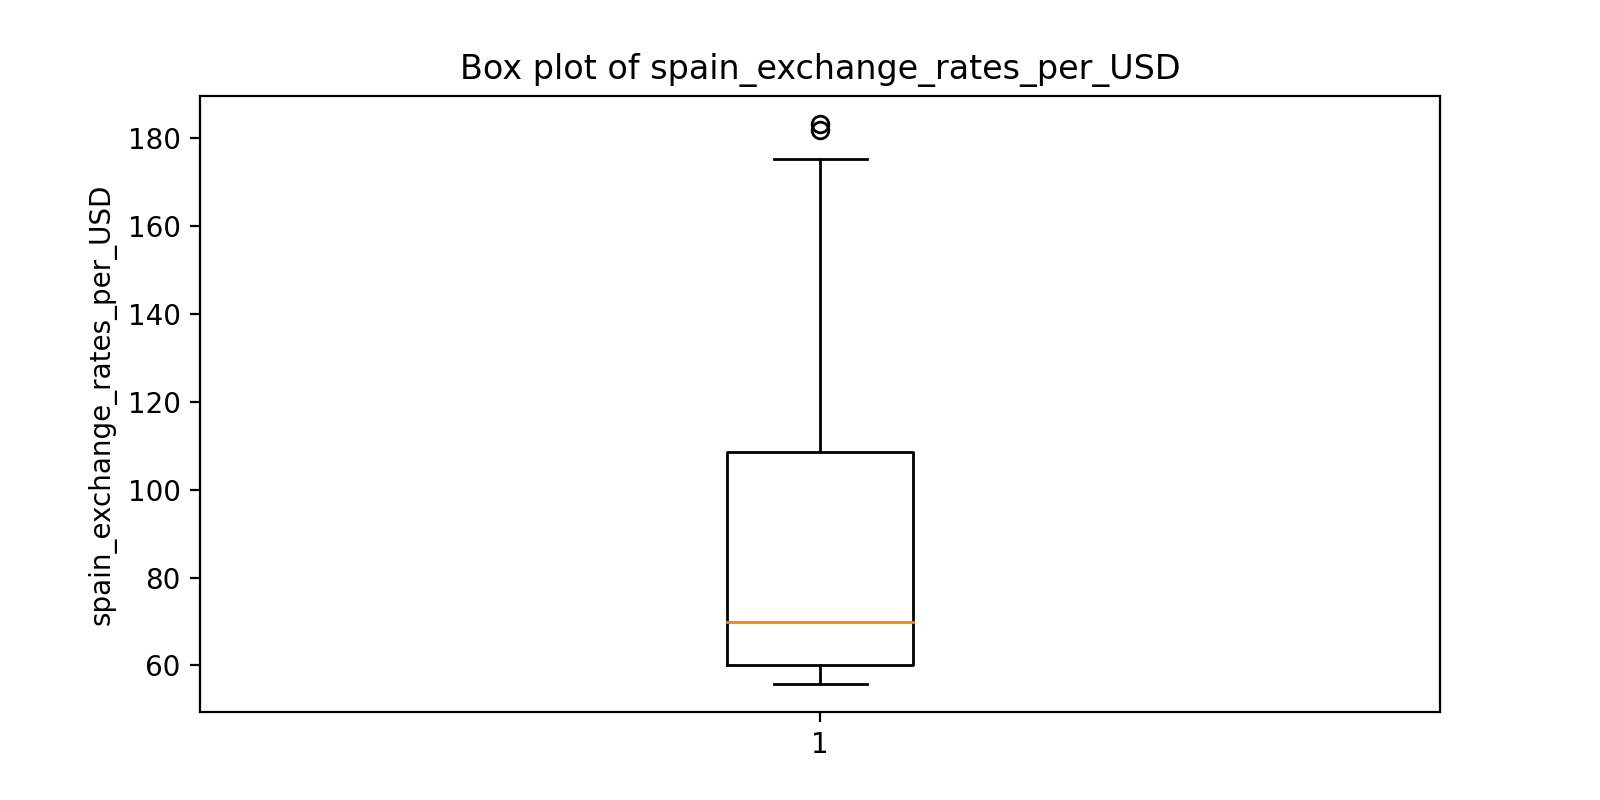

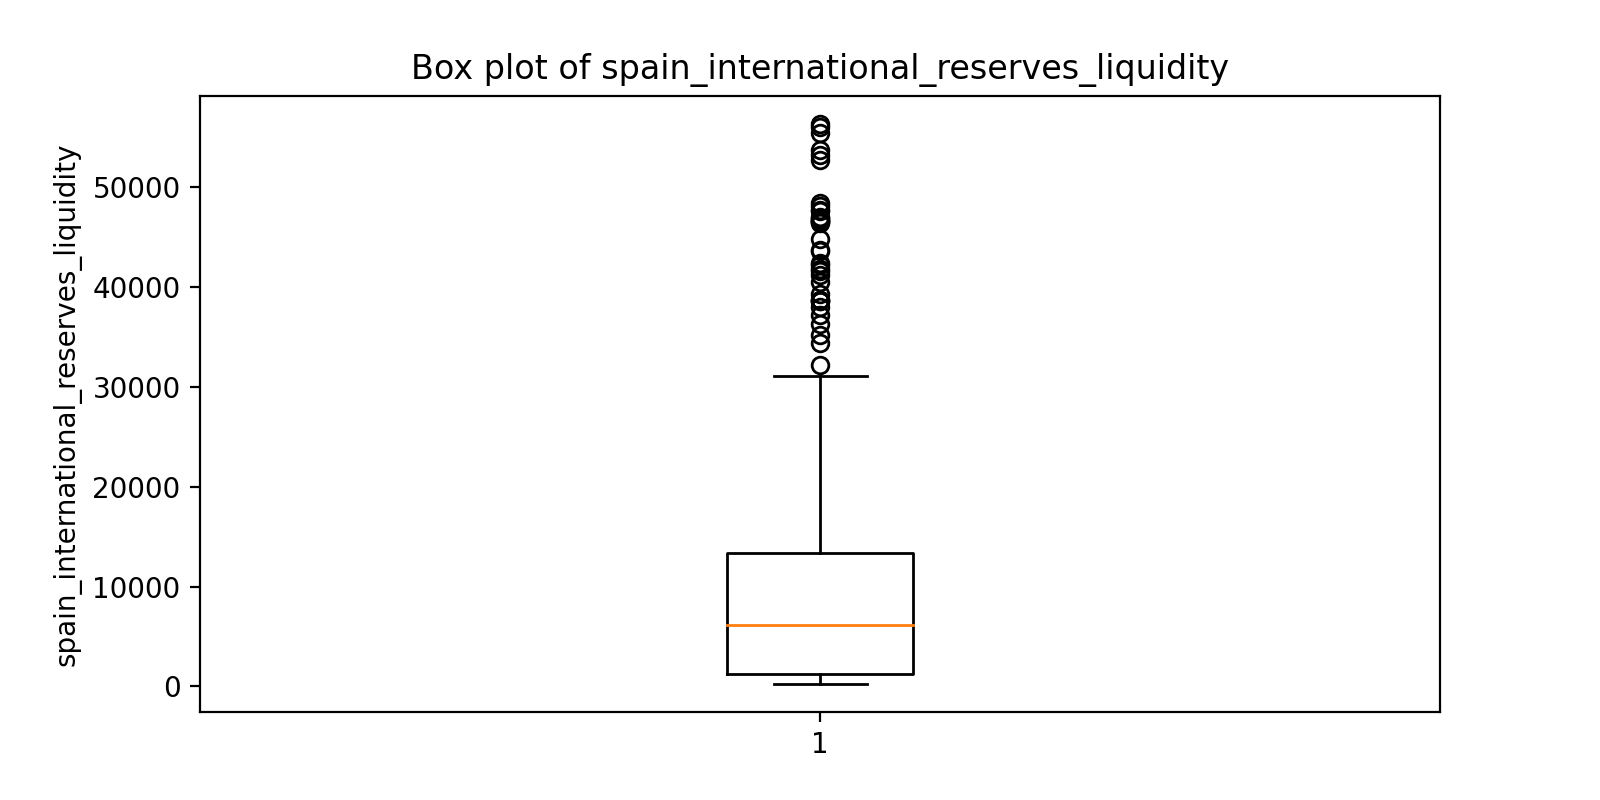

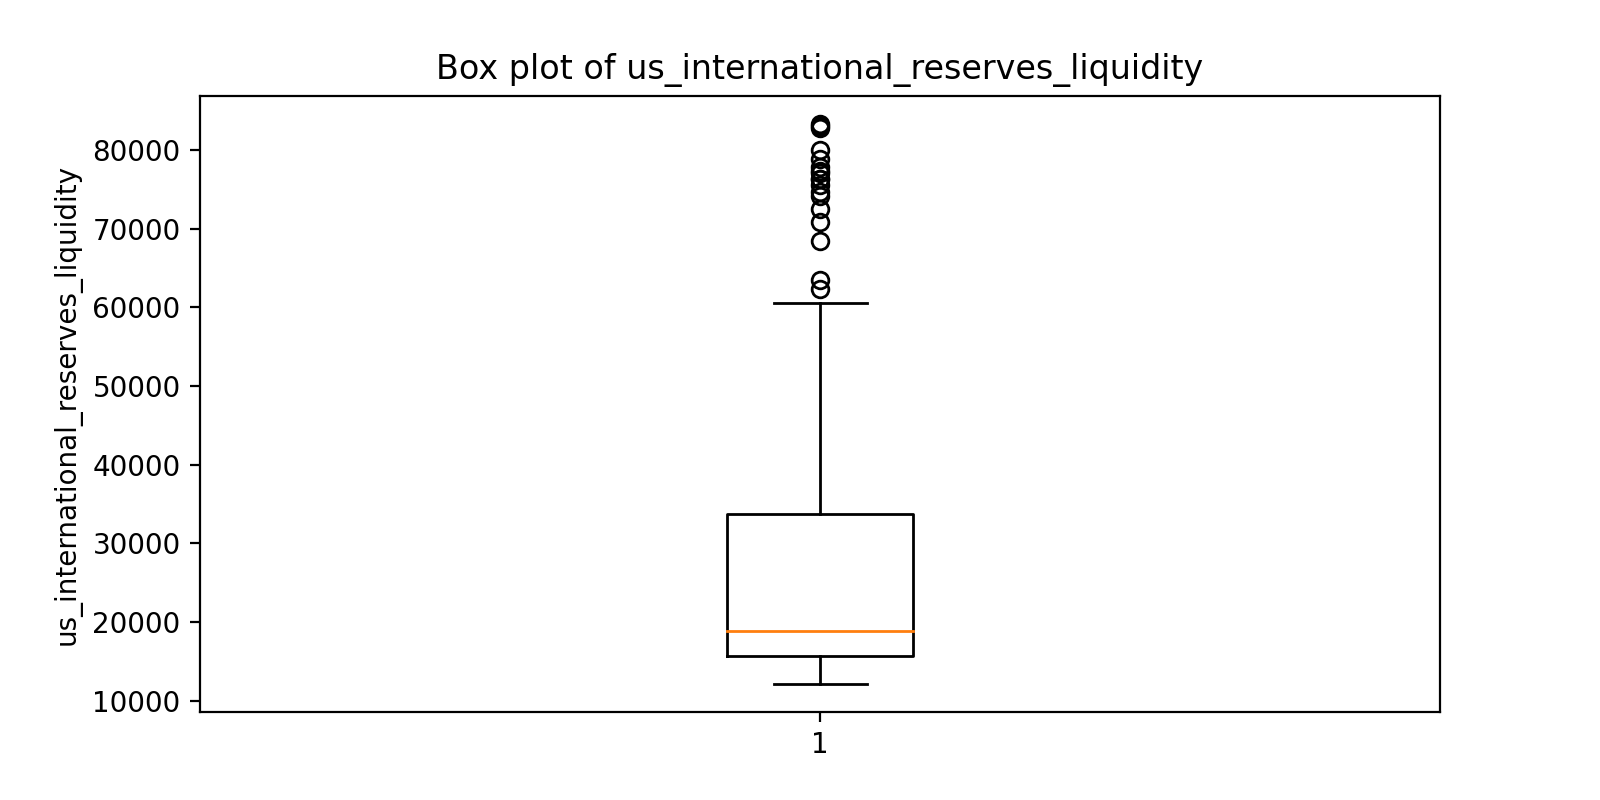

In [163]:
# create a box plot for each column 
bp_columns = ['spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'us_international_reserves_liquidity']
for col in bp_columns:
    plt.figure(figsize=(8,4))
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.boxplot(merged_df[col])
    plt.show()

Conclusion: We confirm that the identified datapoints are outside of upper and lower bounds. They could potentially be outliers.

##### 2.2.2 Identifying if there are any values more than 3 standard deviations from the mean  
add description

In [164]:
spain_exchange_rates_per_USD_mean = merged_df["spain_exchange_rates_per_USD"].mean()
spain_exchange_rates_per_USD_std = merged_df["spain_exchange_rates_per_USD"].std()
spain_exchange_rates_per_USD_outliers = [x for x in merged_df["spain_exchange_rates_per_USD"] if (x > spain_exchange_rates_per_USD_mean + 3*spain_exchange_rates_per_USD_std) or (x < spain_exchange_rates_per_USD_mean - 3*spain_exchange_rates_per_USD_std)]
print('Identified outliers: %d' % len(spain_exchange_rates_per_USD_outliers))


Identified outliers: 0


add conclusion

##### 2.2.3 Plotting each variable on a line graph to visually check for outliers  
add description

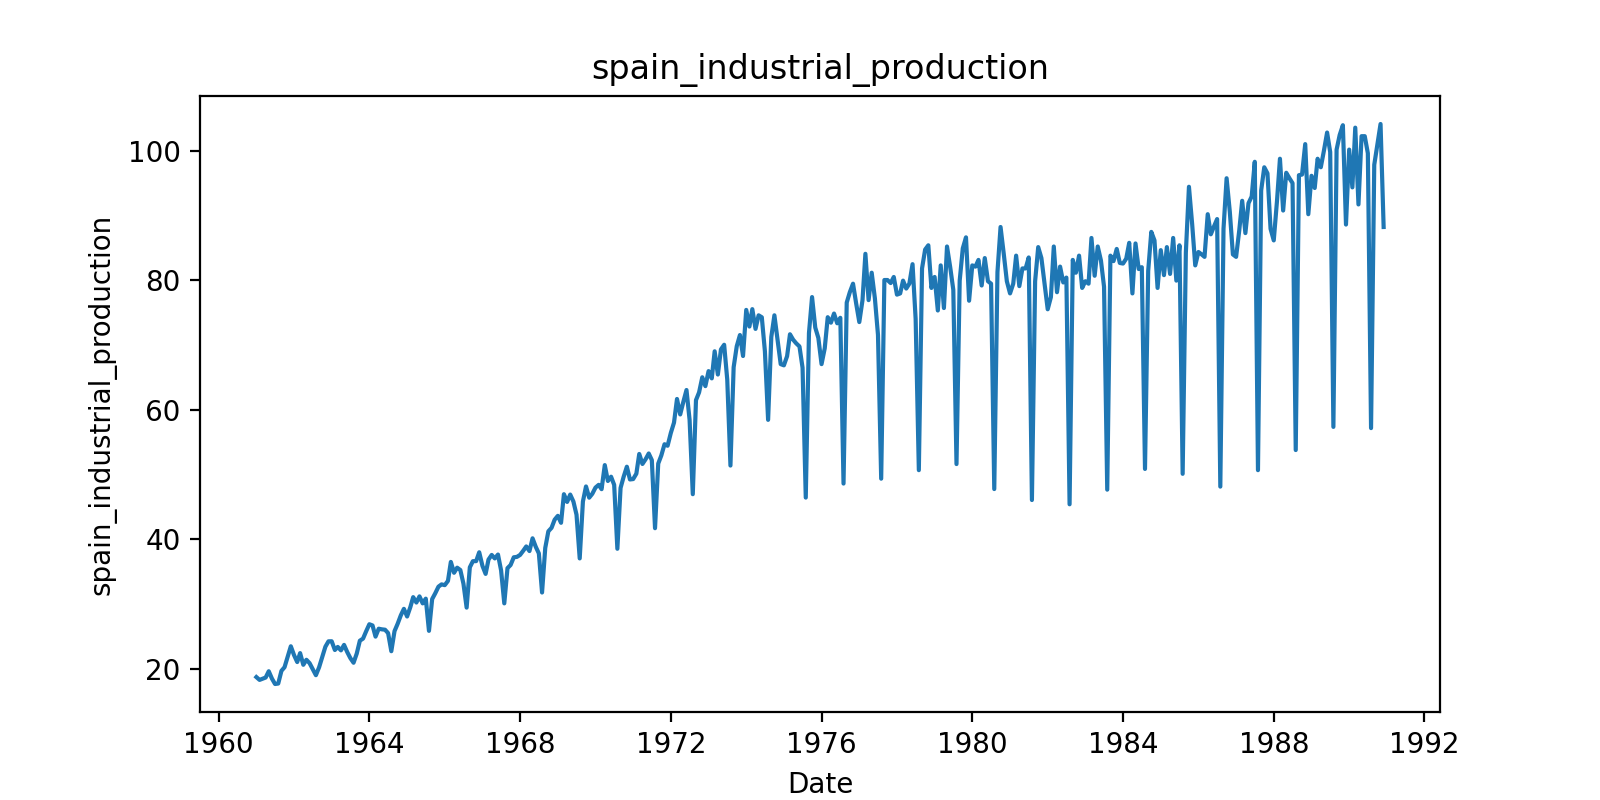

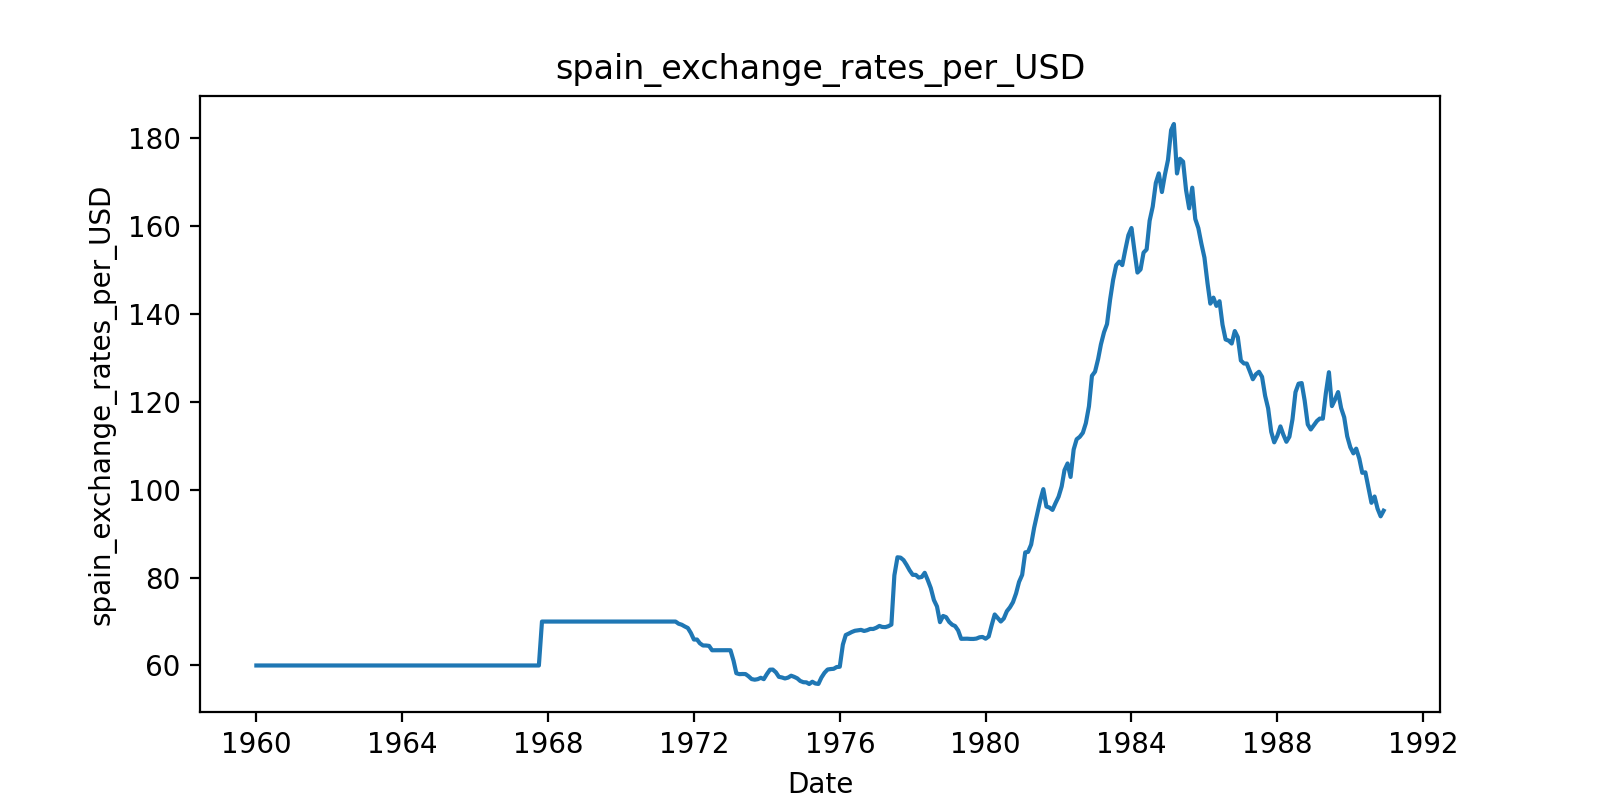

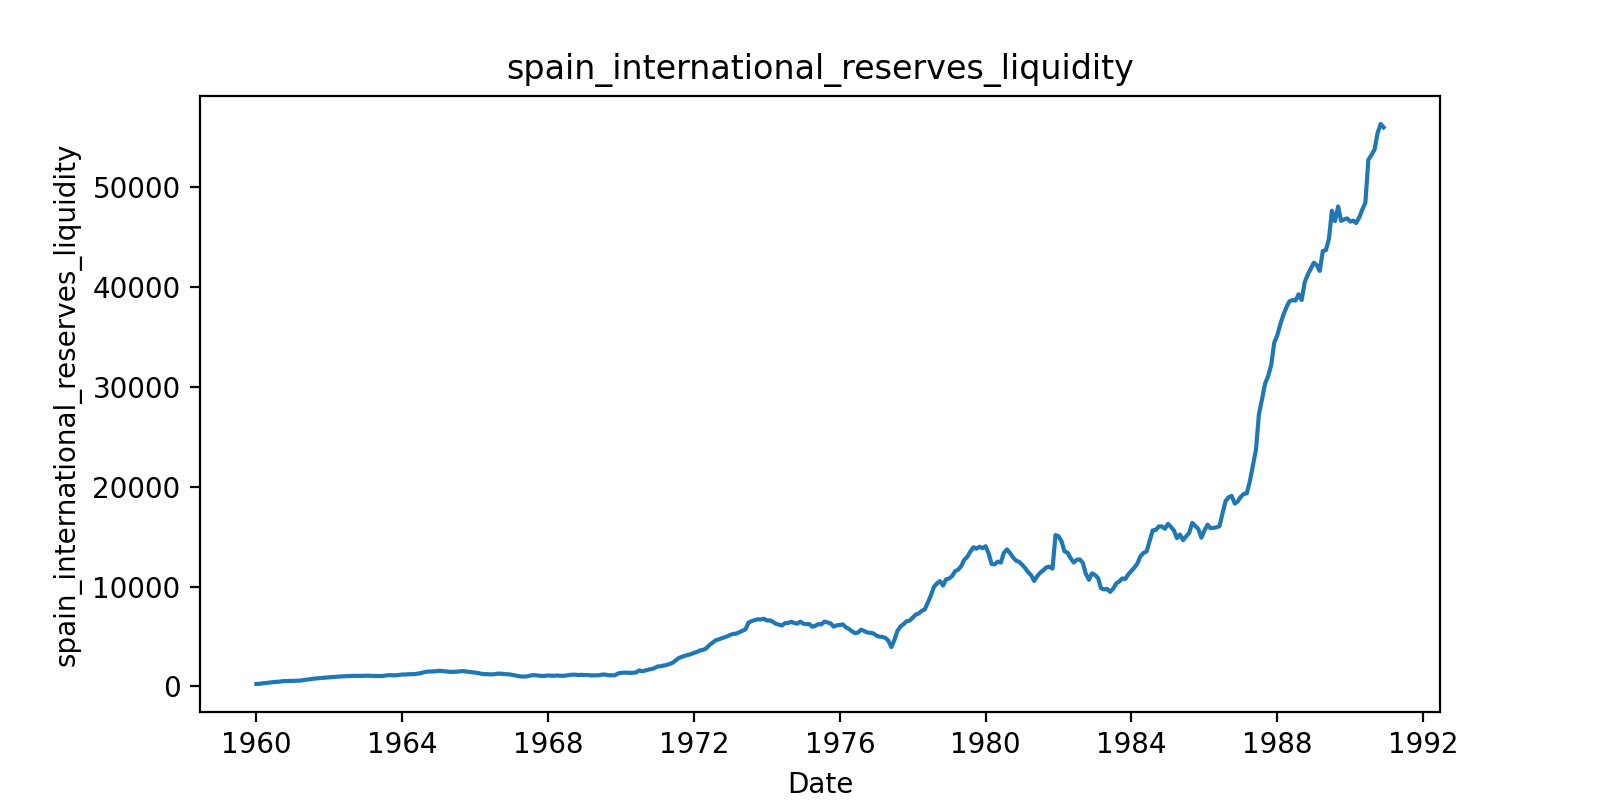

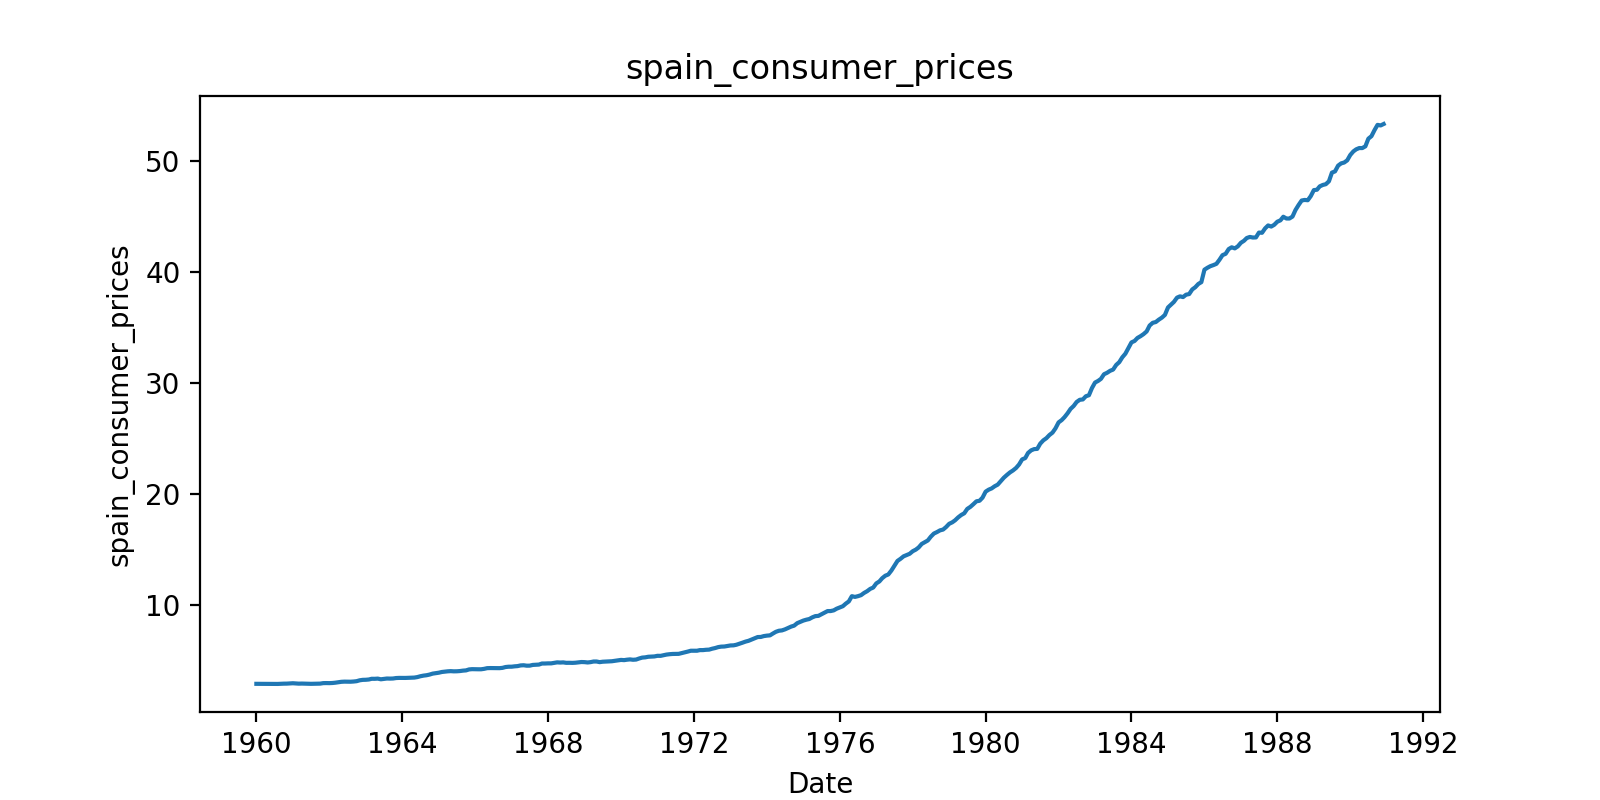

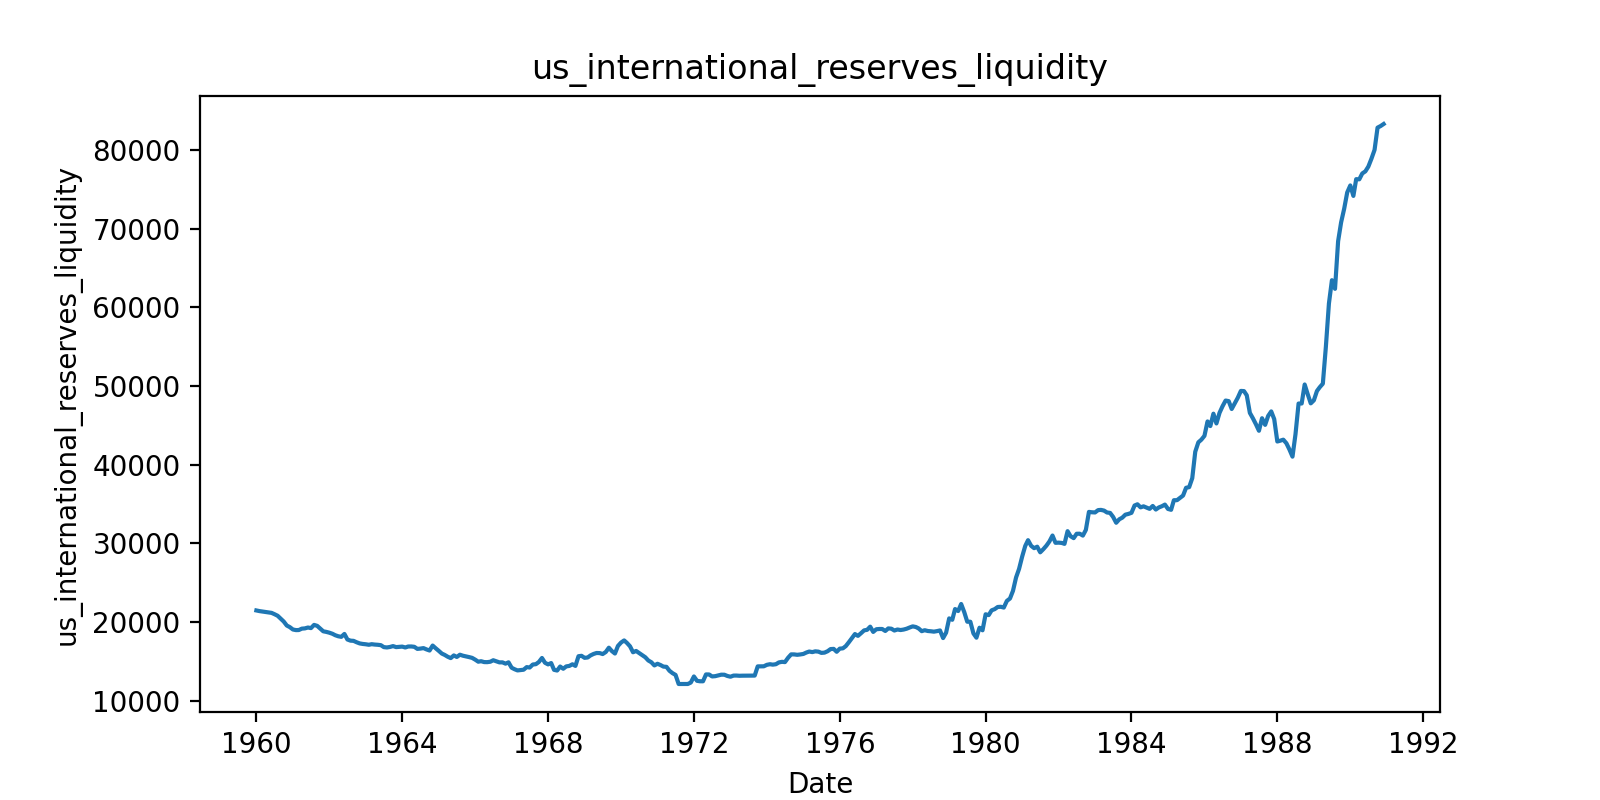

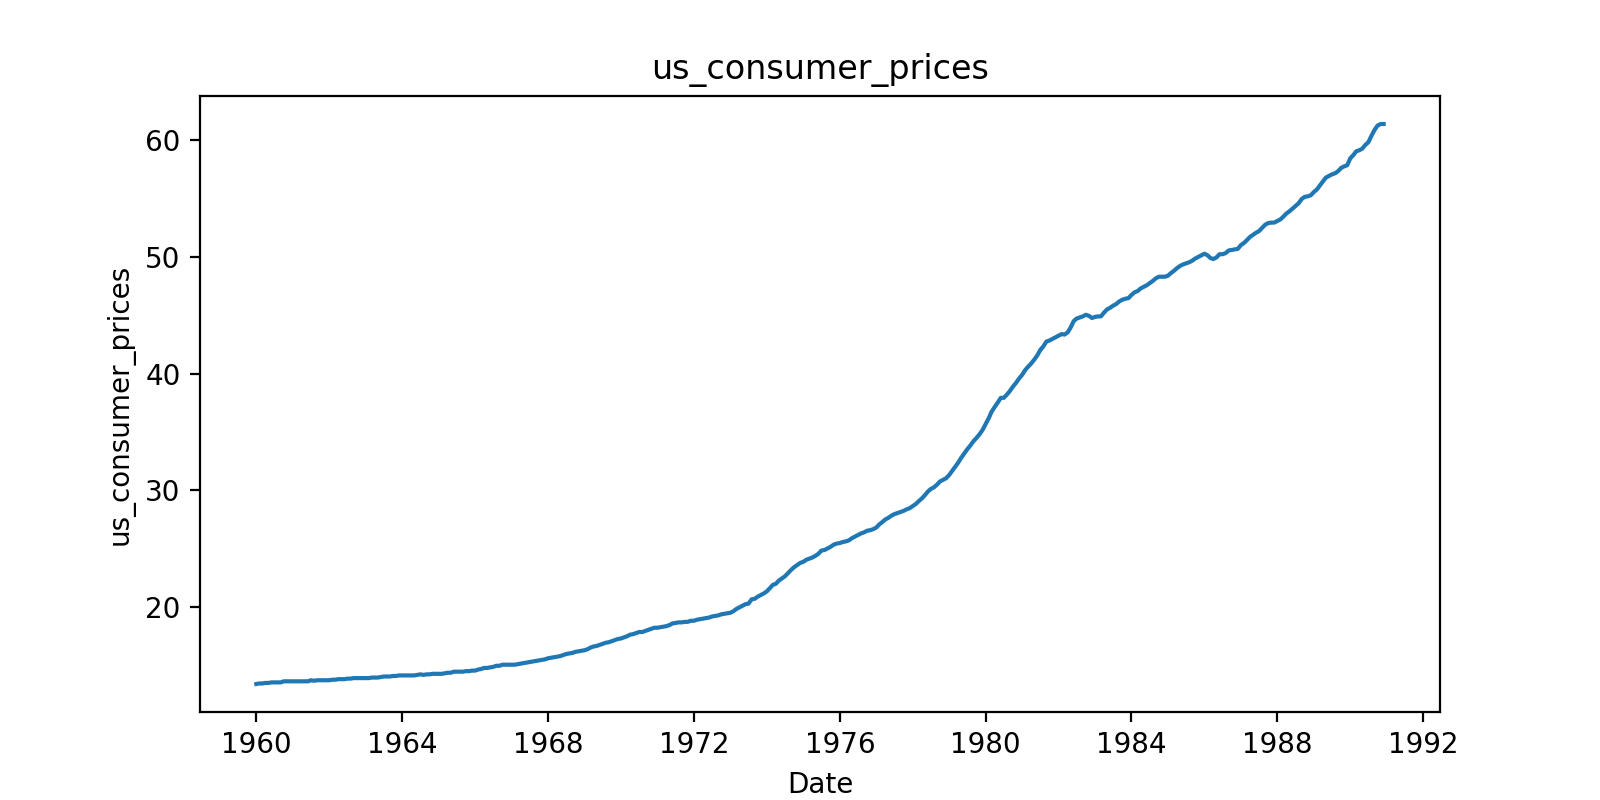

In [165]:
columns = ['spain_industrial_production', 'spain_exchange_rates_per_USD', 'spain_international_reserves_liquidity', 'spain_consumer_prices', 'us_international_reserves_liquidity', 'us_consumer_prices']

for col in columns:
    plt.figure(figsize=(8, 4))
    plt.plot(merged_df['date'], merged_df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()
    

add explanation for spain's exchange rate 1967

add conclusion : no outliers

### 2.3.1 Construct new variables for Spain

In [166]:
# construct a new column for the monthly growth in the nominal exchange rate
merged_df['spain_nominal_exchange_rate_growth'] = merged_df['spain_exchange_rates_per_USD'].pct_change()

# construct a new column for the real exchange rate
# real exchange rate = (nominal exchange rate * foreign (us) price level) / domestic (spain) price level
merged_df['spain_real_exchange_rate'] = (merged_df['spain_exchange_rates_per_USD'] * merged_df['us_consumer_prices']) / merged_df['spain_consumer_prices']

# construct a new column for the monthly growth in the real exchange rate
# real exchange rate growth = (real exchange rate - previous real exchange rate) / previous real exchange rate 
merged_df['spain_real_exchange_rate_growth'] = merged_df['spain_real_exchange_rate'].pct_change()

# construct a new column for the monthly inflation rate
merged_df['spain_inflation_rate'] = merged_df['spain_consumer_prices'].pct_change()

# construct a new column for the monthly growth in industrial production
merged_df['spain_industrial_production_growth'] = merged_df['spain_industrial_production'].pct_change()

# construct a new column for the growth in industrial production vs 12 months ago
merged_df['spain_industrial_production_growth_vs_12_months_ago'] = merged_df['spain_industrial_production'].pct_change(12)

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['spain_international_reserves_liquidity_index'] = (merged_df['spain_international_reserves_liquidity'] / merged_df['spain_international_reserves_liquidity'].iloc[0]) * 100

### 2.3.2 Construct new variables for the US 

In [167]:
# construct a new column for the monthly inflation rate
merged_df['us_inflation_rate'] = merged_df['us_consumer_prices'].pct_change()

# construct a new column for an index of the value of international reserves, base month January 1960 (value of reserves at January 1960 = 100)
merged_df['us_international_reserves_liquidity_index'] = (merged_df['us_international_reserves_liquidity'] / merged_df['us_international_reserves_liquidity'].iloc[0]) * 100

merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_production_growth,spain_industrial_production_growth_vs_12_months_ago,spain_international_reserves_liquidity_index,spain_real_exchange_rate_index,us_inflation_rate,us_international_reserves_liquidity_index,inflation_diff
0,1960-01-01,NaN,60.000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,1.218834,NaN,100.000000,NaN
1,1960-02-01,NaN,60.000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,1.223987,0.003413,99.616353,-0.004224
2,1960-03-01,NaN,60.000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,1.225479,0.000000,99.378902,-0.001218
3,1960-04-01,NaN,60.000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,1.228649,0.003401,99.068353,-0.002588
4,1960-05-01,NaN,60.000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,1.232403,0.000000,98.864890,-0.003046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608,-0.035075,112.179914,-0.030444,0.004383,-0.426276,-0.003284,22844.513855,0.484590,0.009202,367.392080,-0.004820
368,1990-09-01,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066,0.014820,113.598321,0.012644,0.010526,0.711697,-0.023496,23085.917475,0.490717,0.008359,372.584941,0.002167
369,1990-10-01,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946,-0.028131,110.090860,-0.030876,0.008878,0.031761,-0.014706,23788.858617,0.475565,0.006029,385.751982,0.002849
370,1990-11-01,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525,-0.018172,108.441839,-0.014979,-0.001002,0.031716,0.001812,24183.631902,0.468442,0.002247,386.716715,-0.003249


### 2.4 Save merged_df as a CSV file 

In [168]:
merged_df.to_csv('merged_data.csv', index=False)

## 3. Analysis

### 3.1 Exchange Rate and International Reserve Graphs

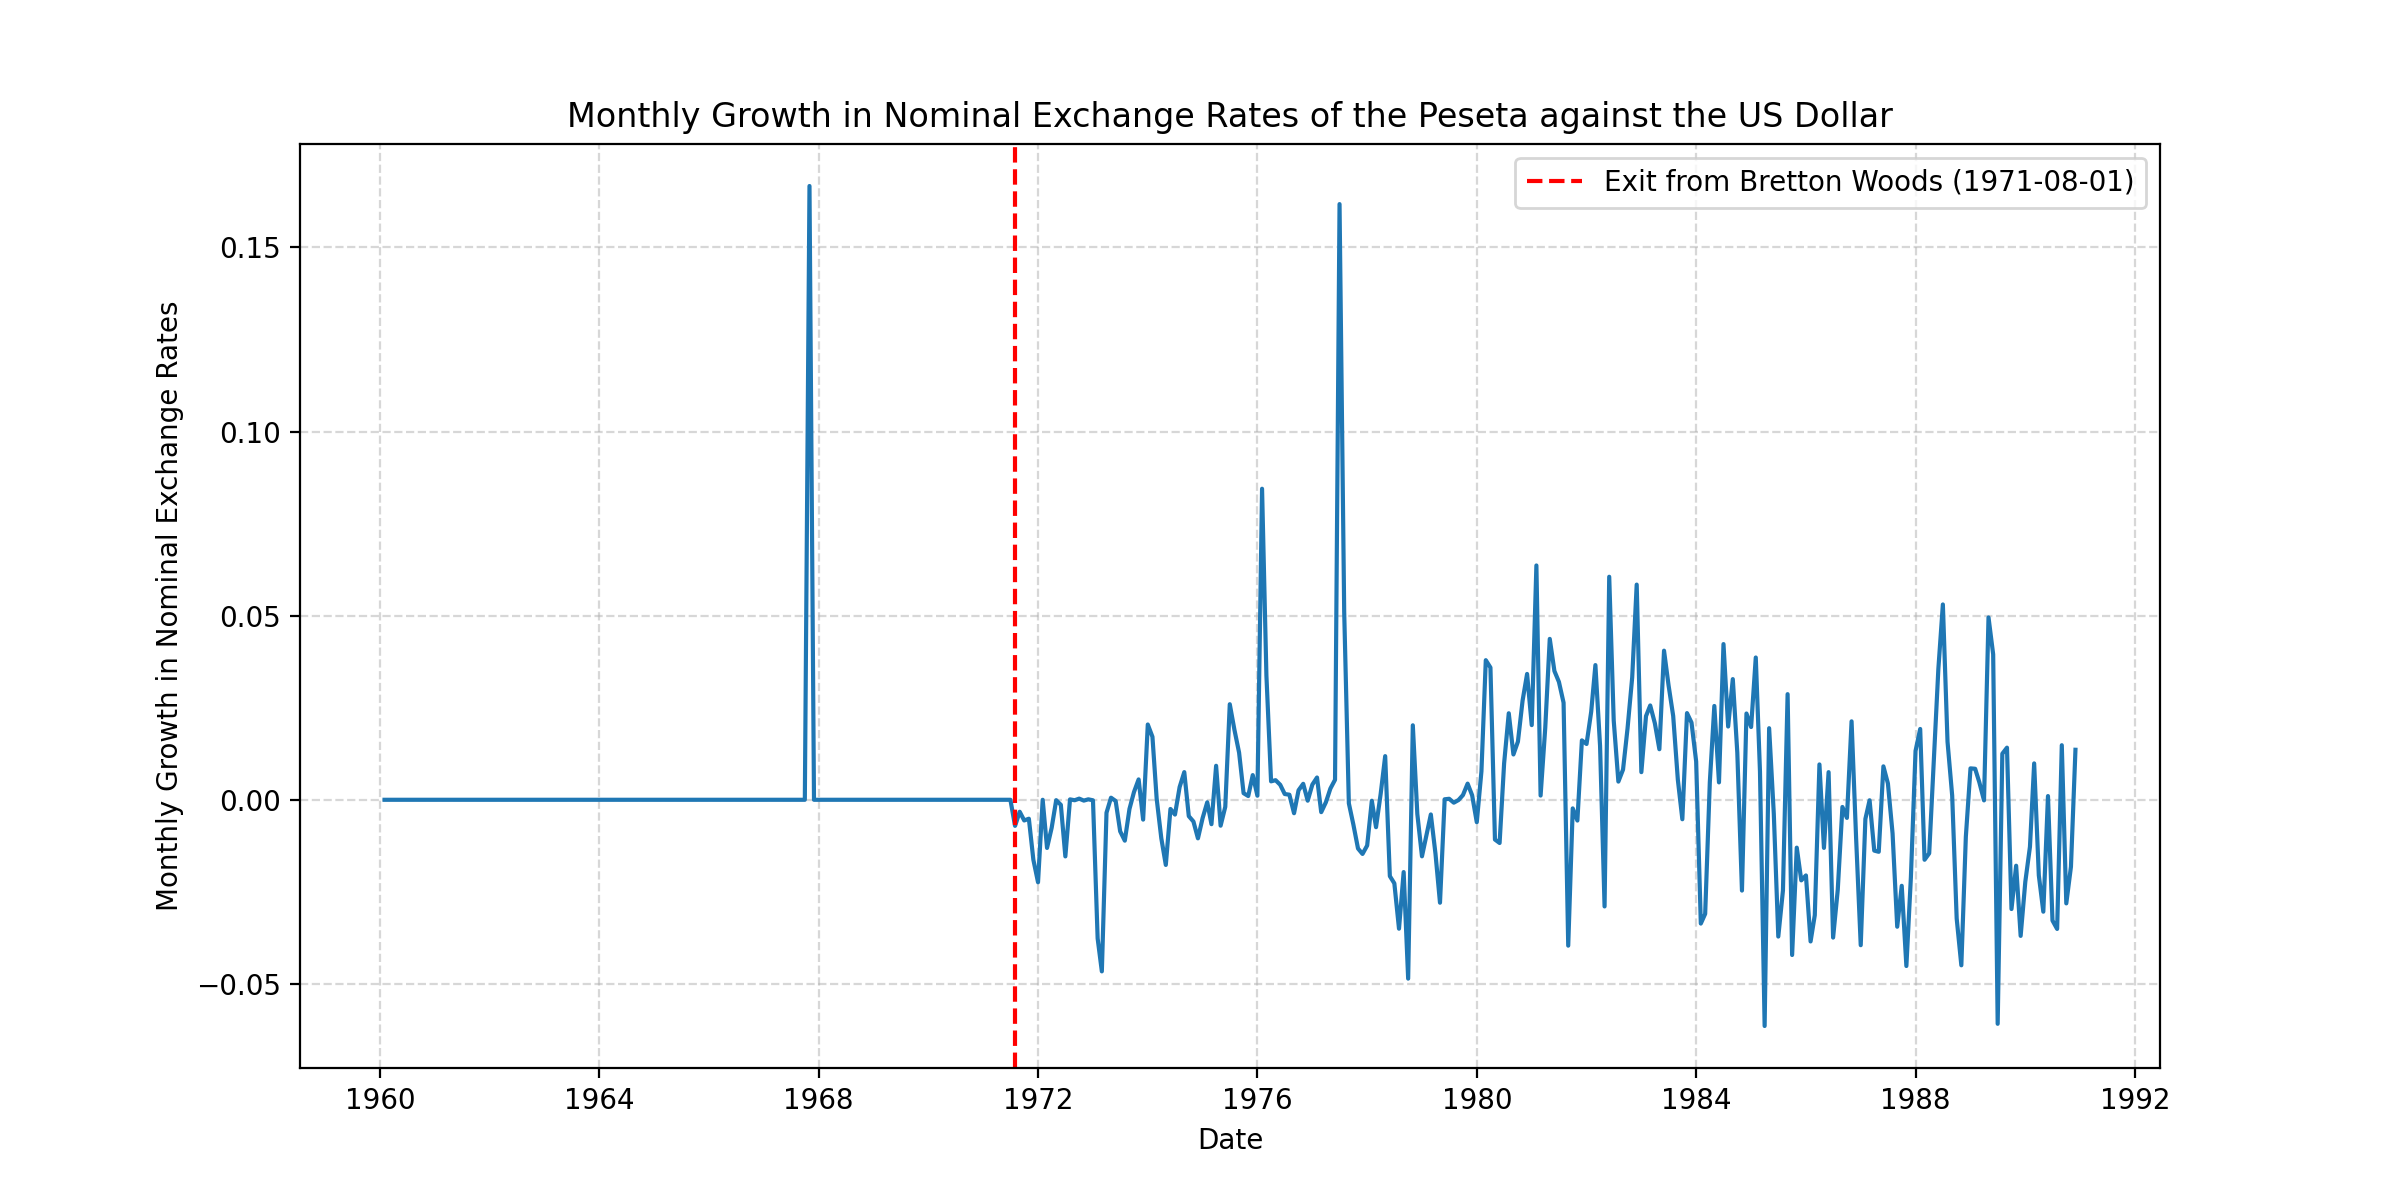

In [169]:
# Plot a time series graph of the monthly growth in nominal exchange rates of the peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_nominal_exchange_rate_growth'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Monthly Growth in Nominal Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Nominal Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_nominal_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

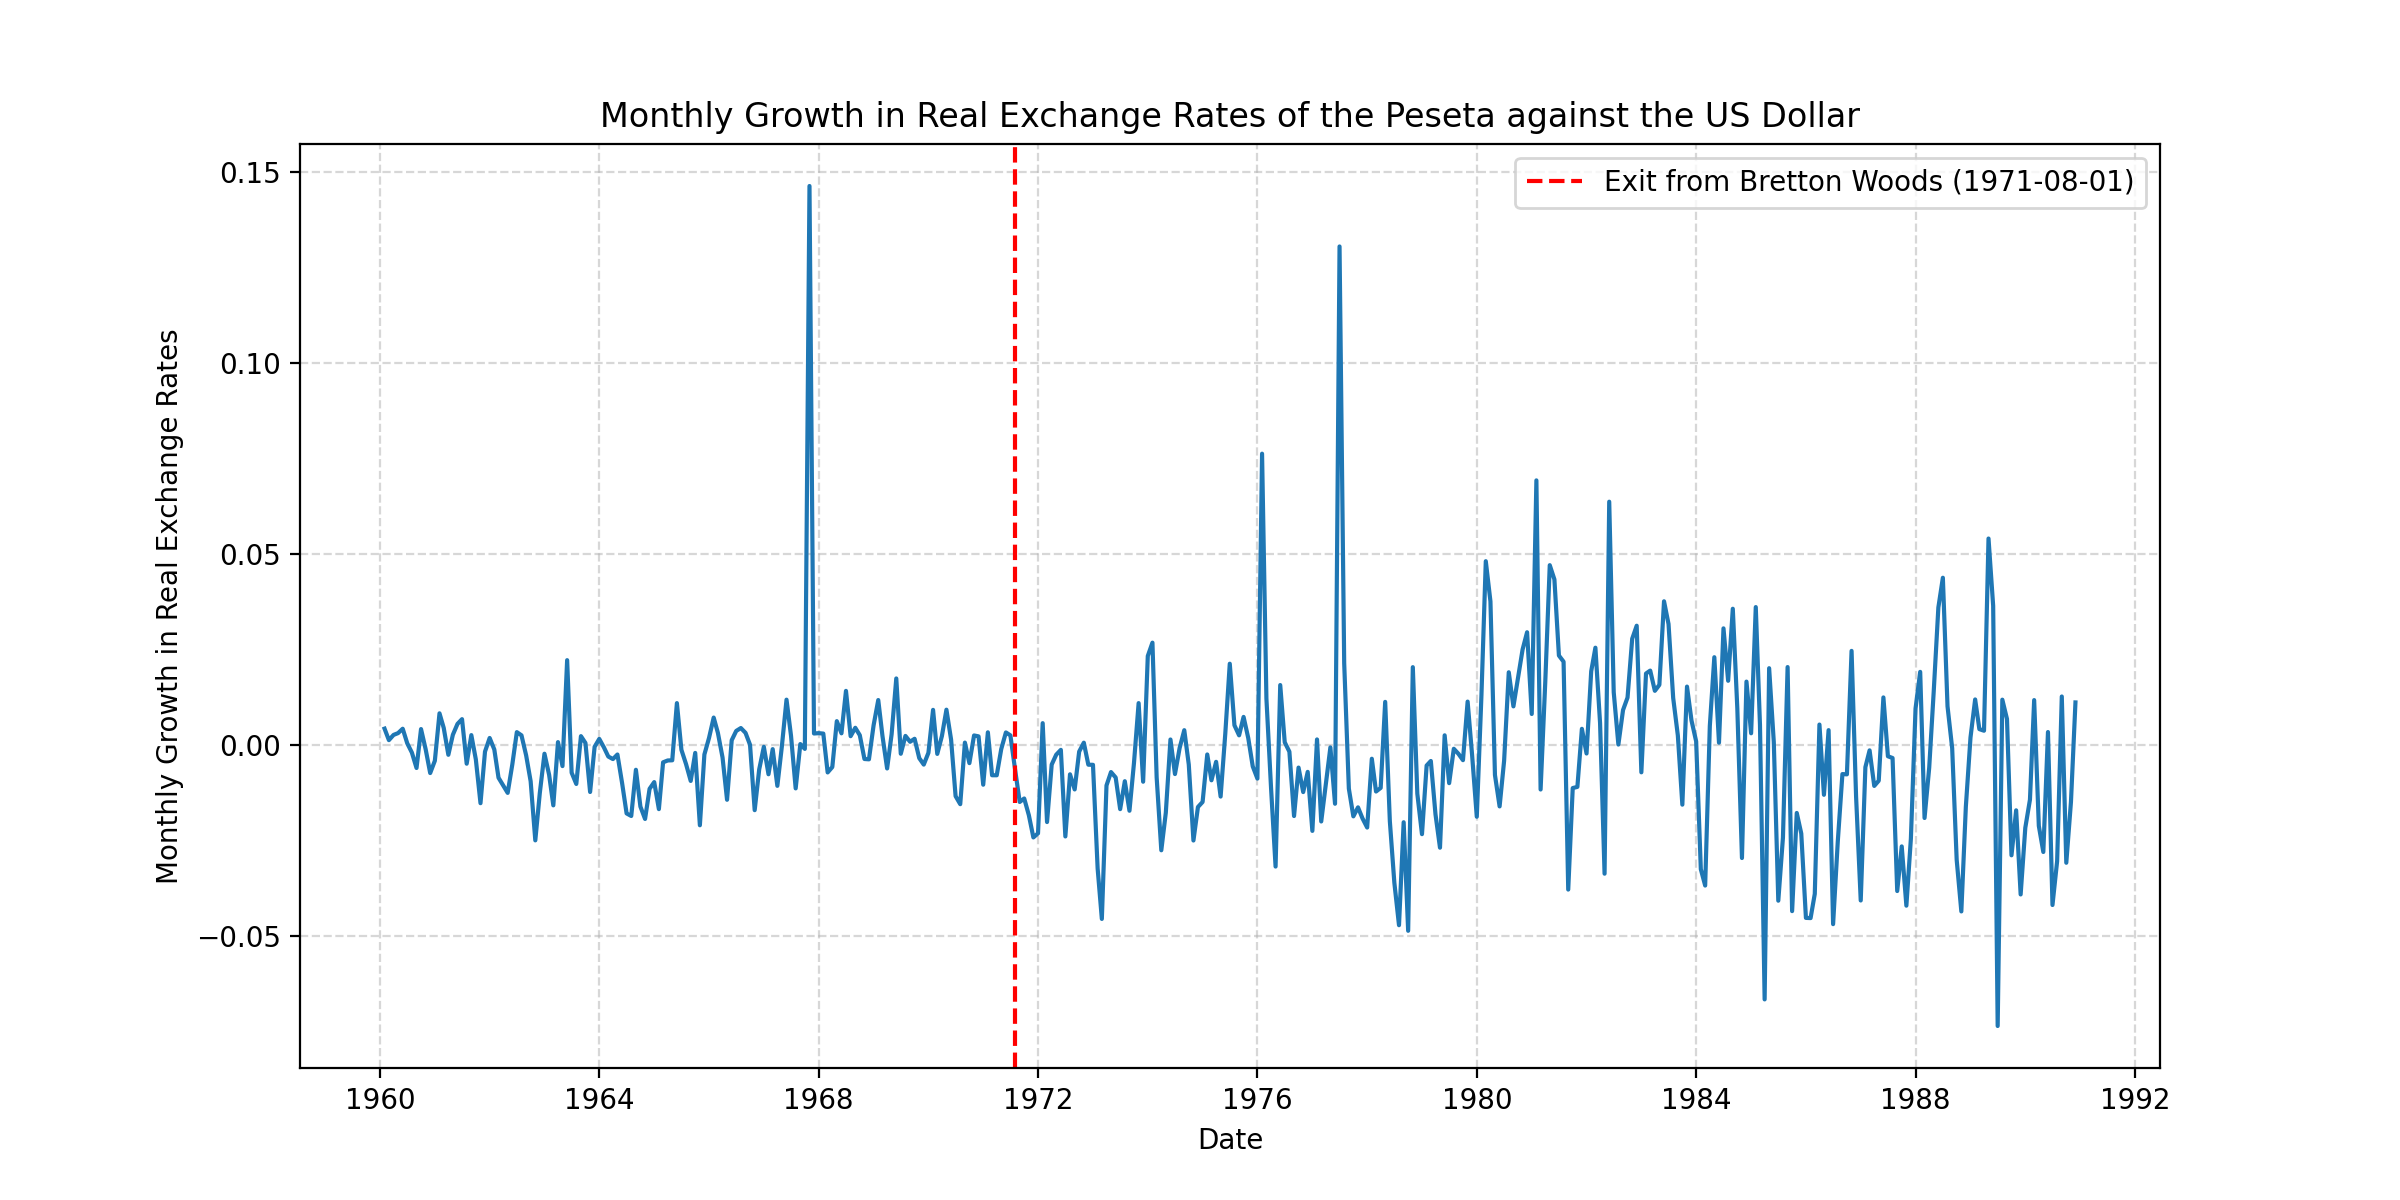

In [170]:
# Plot a time series graph of the monthly growth in real exchange rates of the peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate_growth'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Monthly Growth in Real Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Real Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_real_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

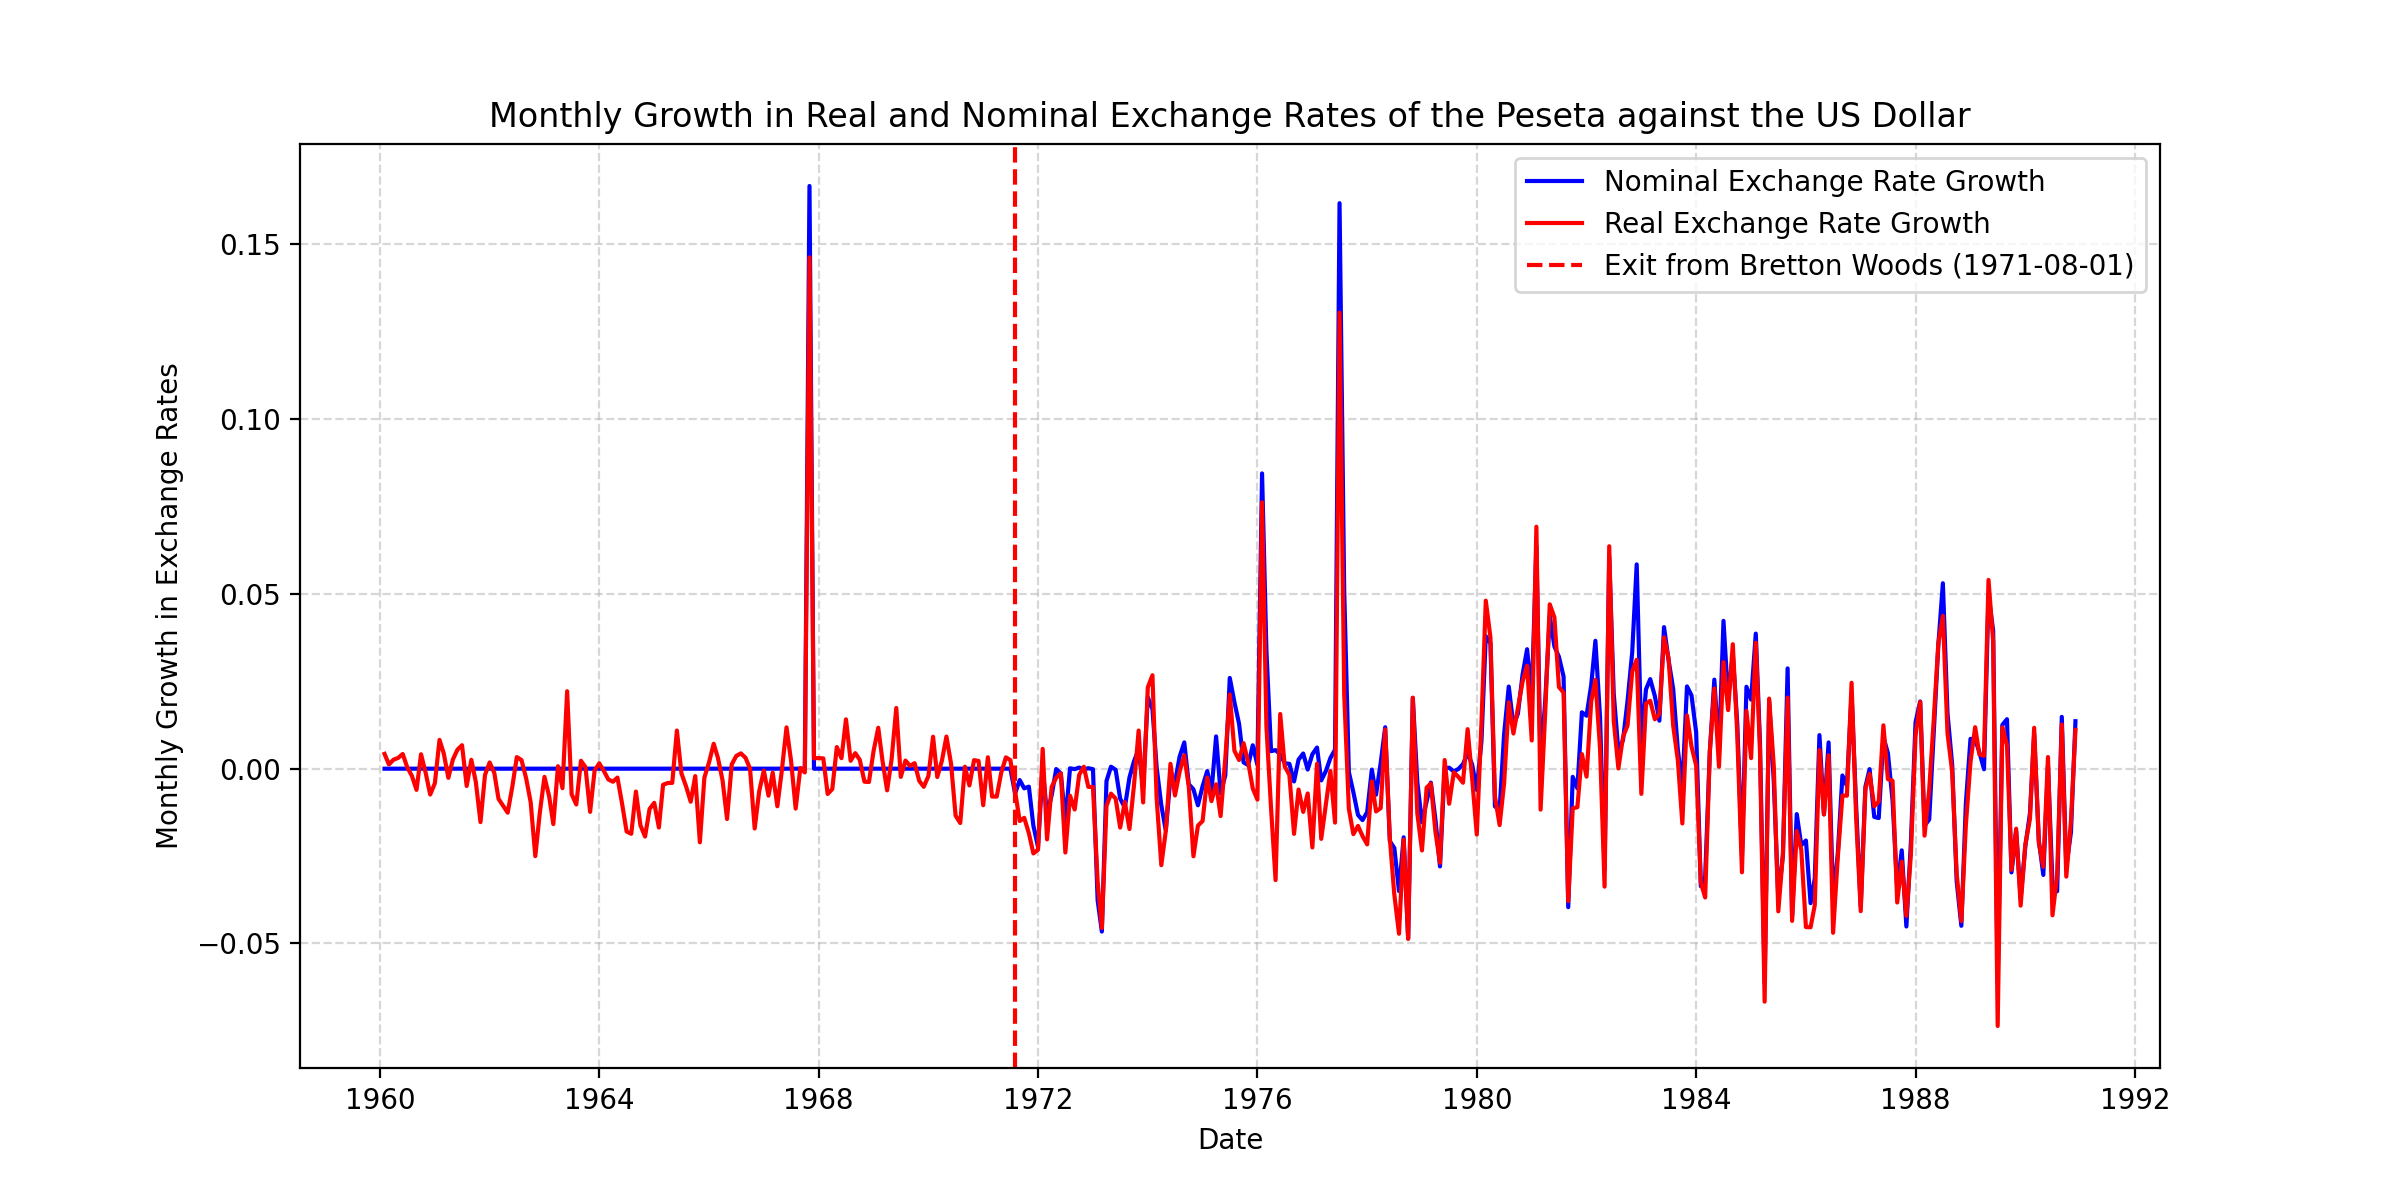

In [171]:
# plot monthly growth in real and nominal exchange rates in the same graph

plt.plot(merged_df['date'], merged_df['spain_nominal_exchange_rate_growth'], label='Nominal Exchange Rate Growth', color='blue')
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate_growth'], label='Real Exchange Rate Growth', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.legend()
plt.title('Monthly Growth in Real and Nominal Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Exchange Rates')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/monthly_growth_in_real_and_nominal_exchange_rates_of_the_peseta_against_the_us_dollar.png', dpi=300)

plt.show()

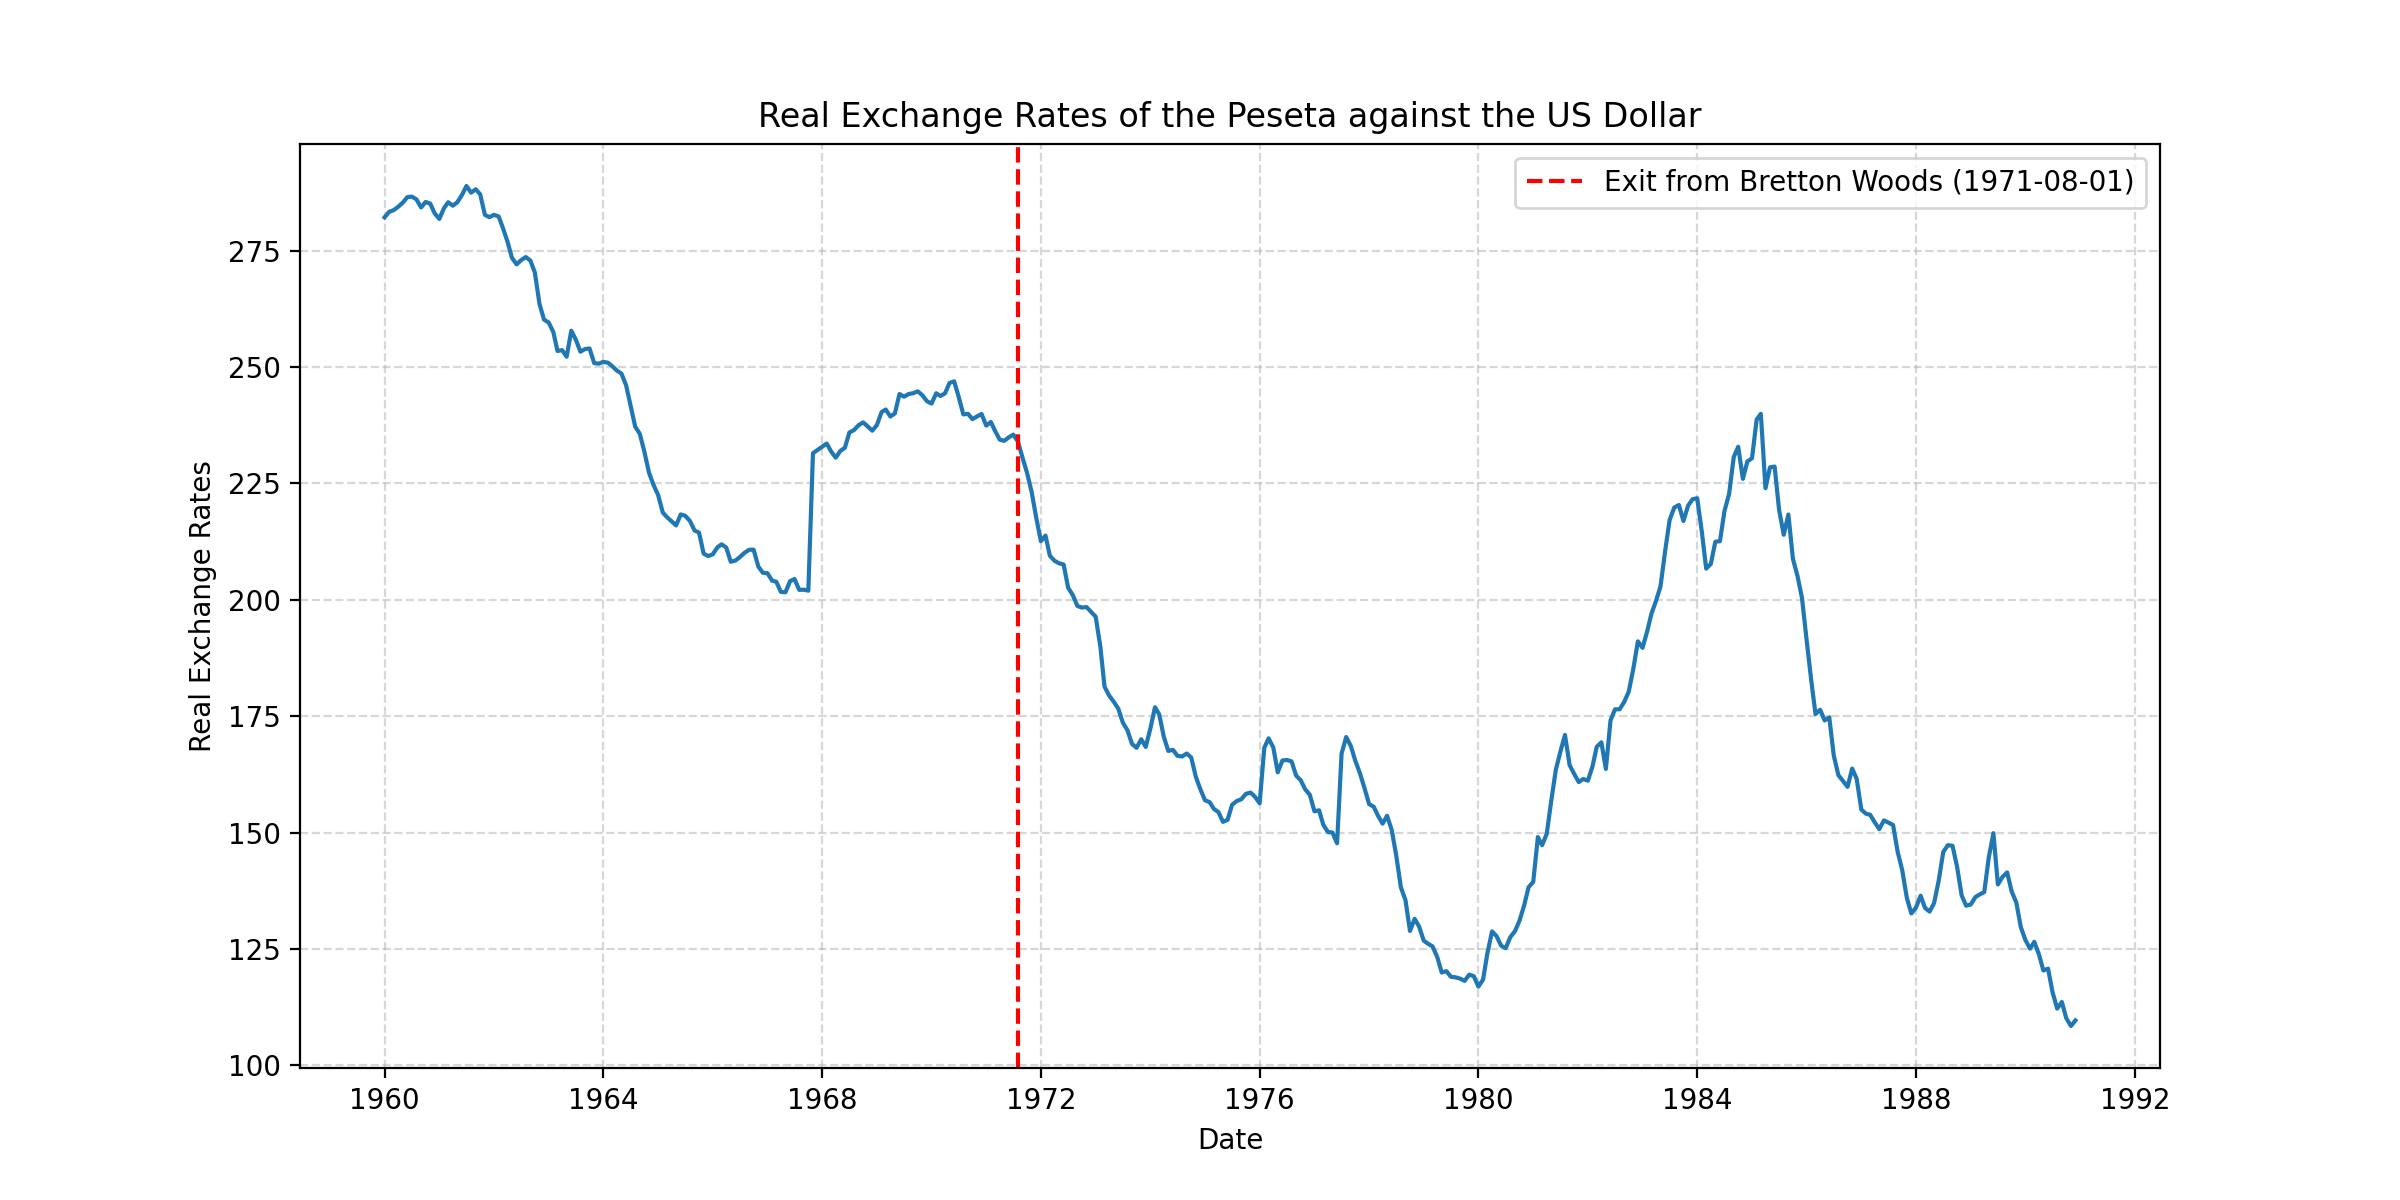

In [172]:
# Plot a time series graph of the real exchange rate level of the Peseta against the US dollar

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate'])
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.title('Real Exchange Rates of the Peseta against the US Dollar')
plt.xlabel('Date')
plt.ylabel('Real Exchange Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/real_exchange_rates_of_the_reseta_against_the_us_dollar.png', dpi=300)

plt.show()


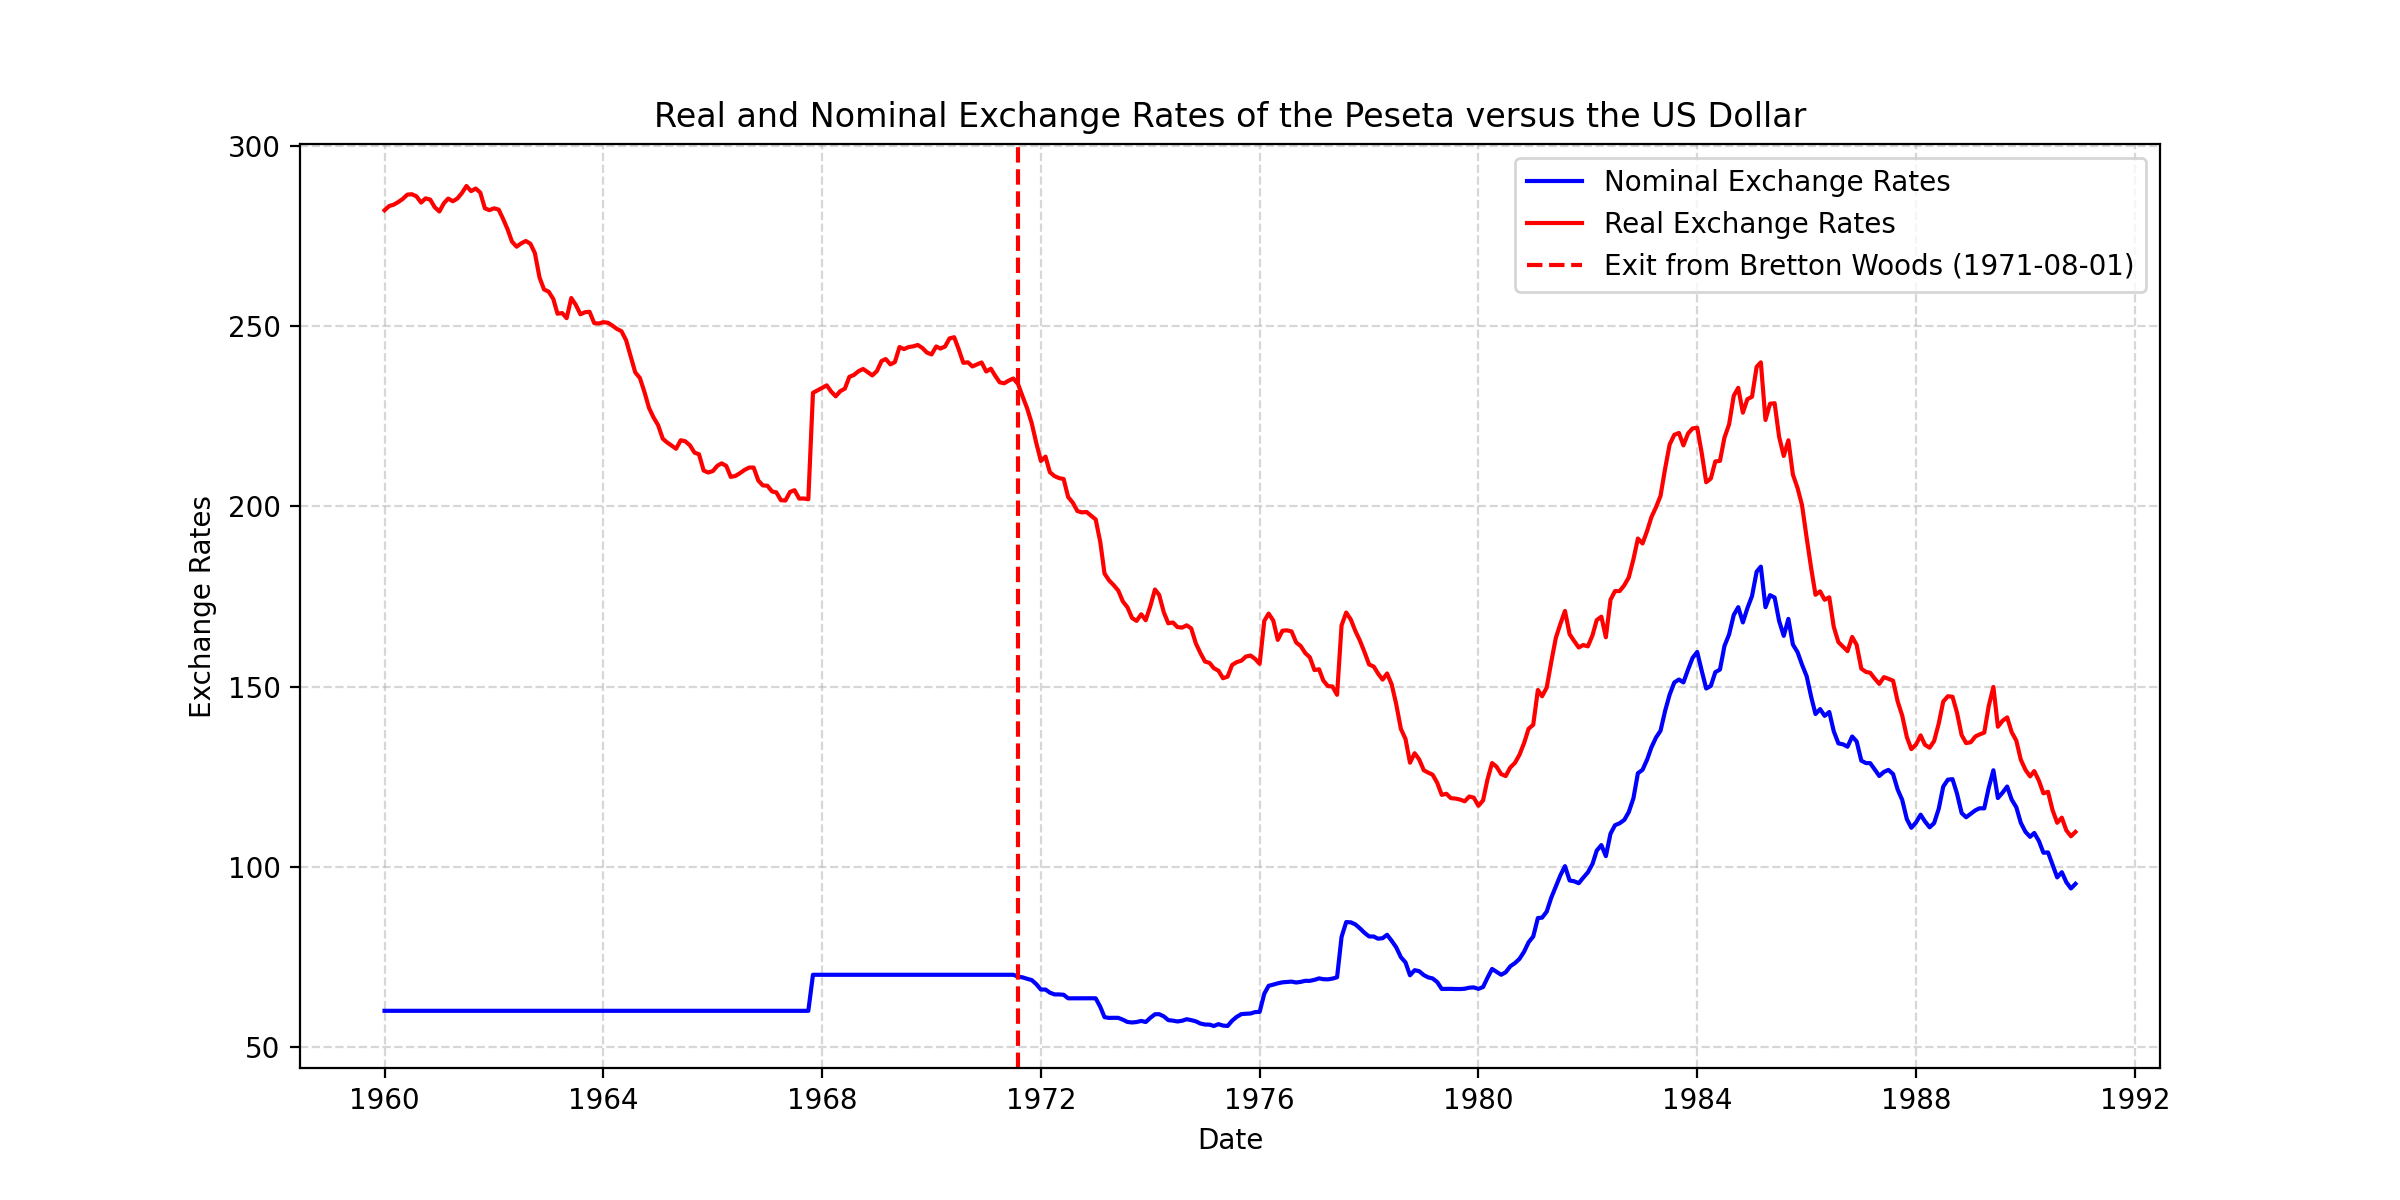

In [173]:
# plot a time series graph of the real and nominal exchange rates in the same graph

plt.plot(merged_df['date'], merged_df['spain_exchange_rates_per_USD'], label='Nominal Exchange Rates', color='blue')
plt.plot(merged_df['date'], merged_df['spain_real_exchange_rate'], label='Real Exchange Rates', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

plt.legend()
plt.title('Real and Nominal Exchange Rates of the Peseta versus the US Dollar')
plt.xlabel('Date')
plt.ylabel('Exchange Rates')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/real_and_nominal_exchange_rates_of_the_peseta_versus_the_us_dollar.png', dpi=300)

plt.show()

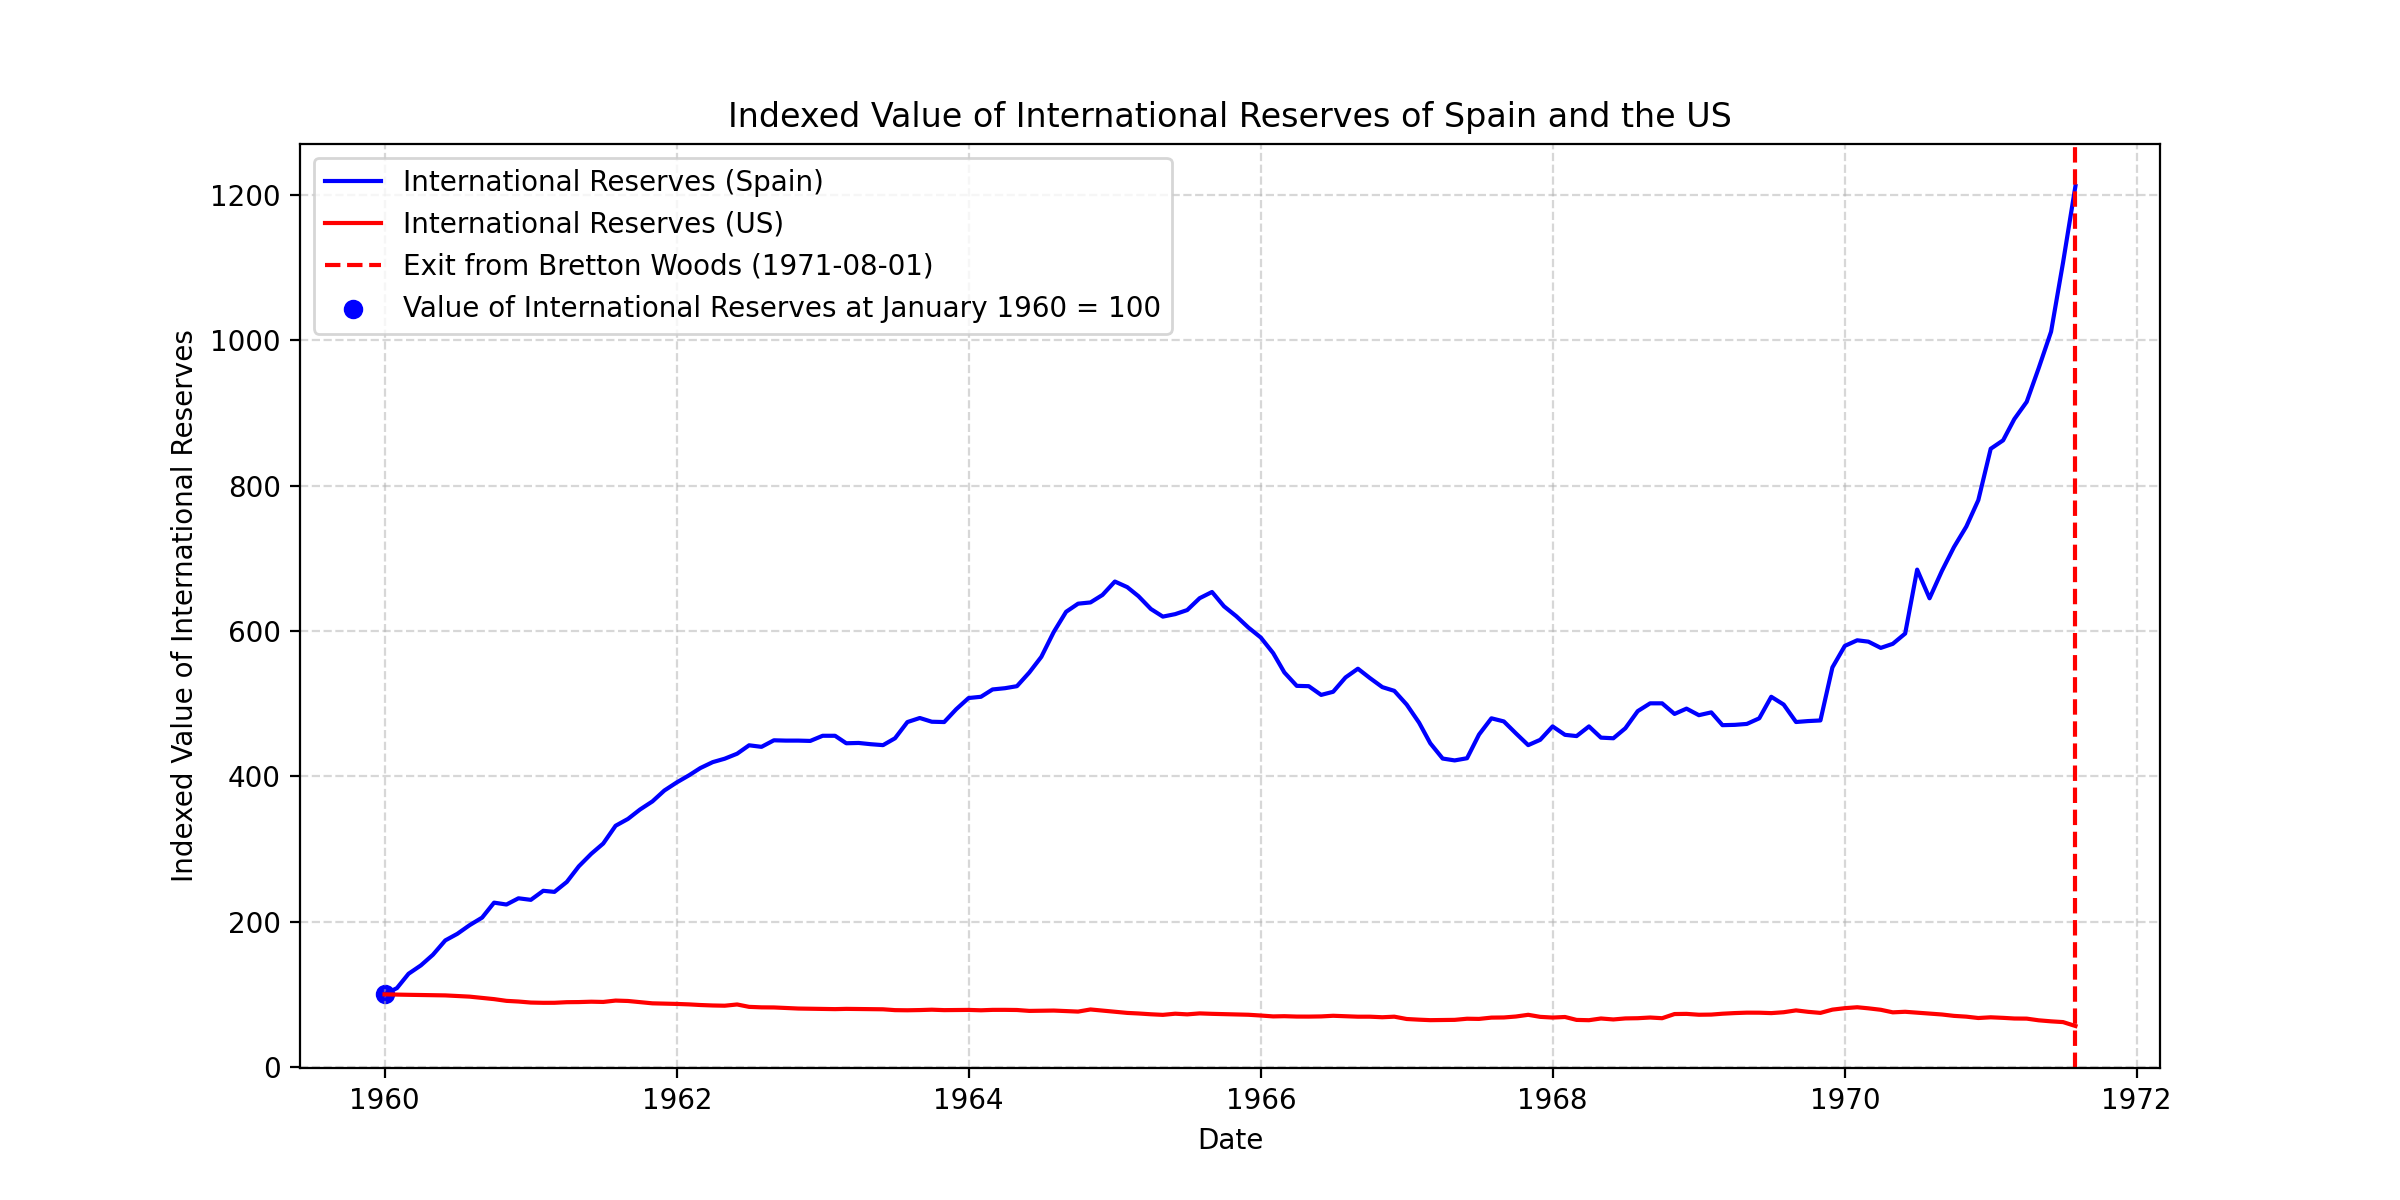

In [174]:
filtered_df = merged_df[(merged_df['date'] >= '1960-01-01') & (merged_df['date'] <= '1971-08-01')]

# Plot a time series graph of the monthly indexed value of international reserves of Spain and the US from January 1960 until August 1971 (when the US exited the Bretton Woods system)

plt.plot(filtered_df['date'], filtered_df['spain_international_reserves_liquidity_index'], label='International Reserves (Spain)', color='blue')
plt.plot(filtered_df['date'], filtered_df['us_international_reserves_liquidity_index'], label='International Reserves (US)', color='red')
plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')
# add a point at January 1960
plt.scatter(pd.to_datetime('1960-01-01'), filtered_df['spain_international_reserves_liquidity_index'].iloc[0], color='blue')
# add a point in the legend for January 1960
plt.scatter([], [], color='blue', label='Value of International Reserves at January 1960 = 100')

plt.legend()
plt.title('Indexed Value of International Reserves of Spain and the US')
plt.xlabel('Date')
plt.ylabel('Indexed Value of International Reserves')
plt.gcf().set_size_inches(12, 6)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('plots/indexed_value_of_international_reserves_of_spain_and_the_us.png', dpi=300)

plt.show()

### 3.2 Inflation and Industrial Production Graphs

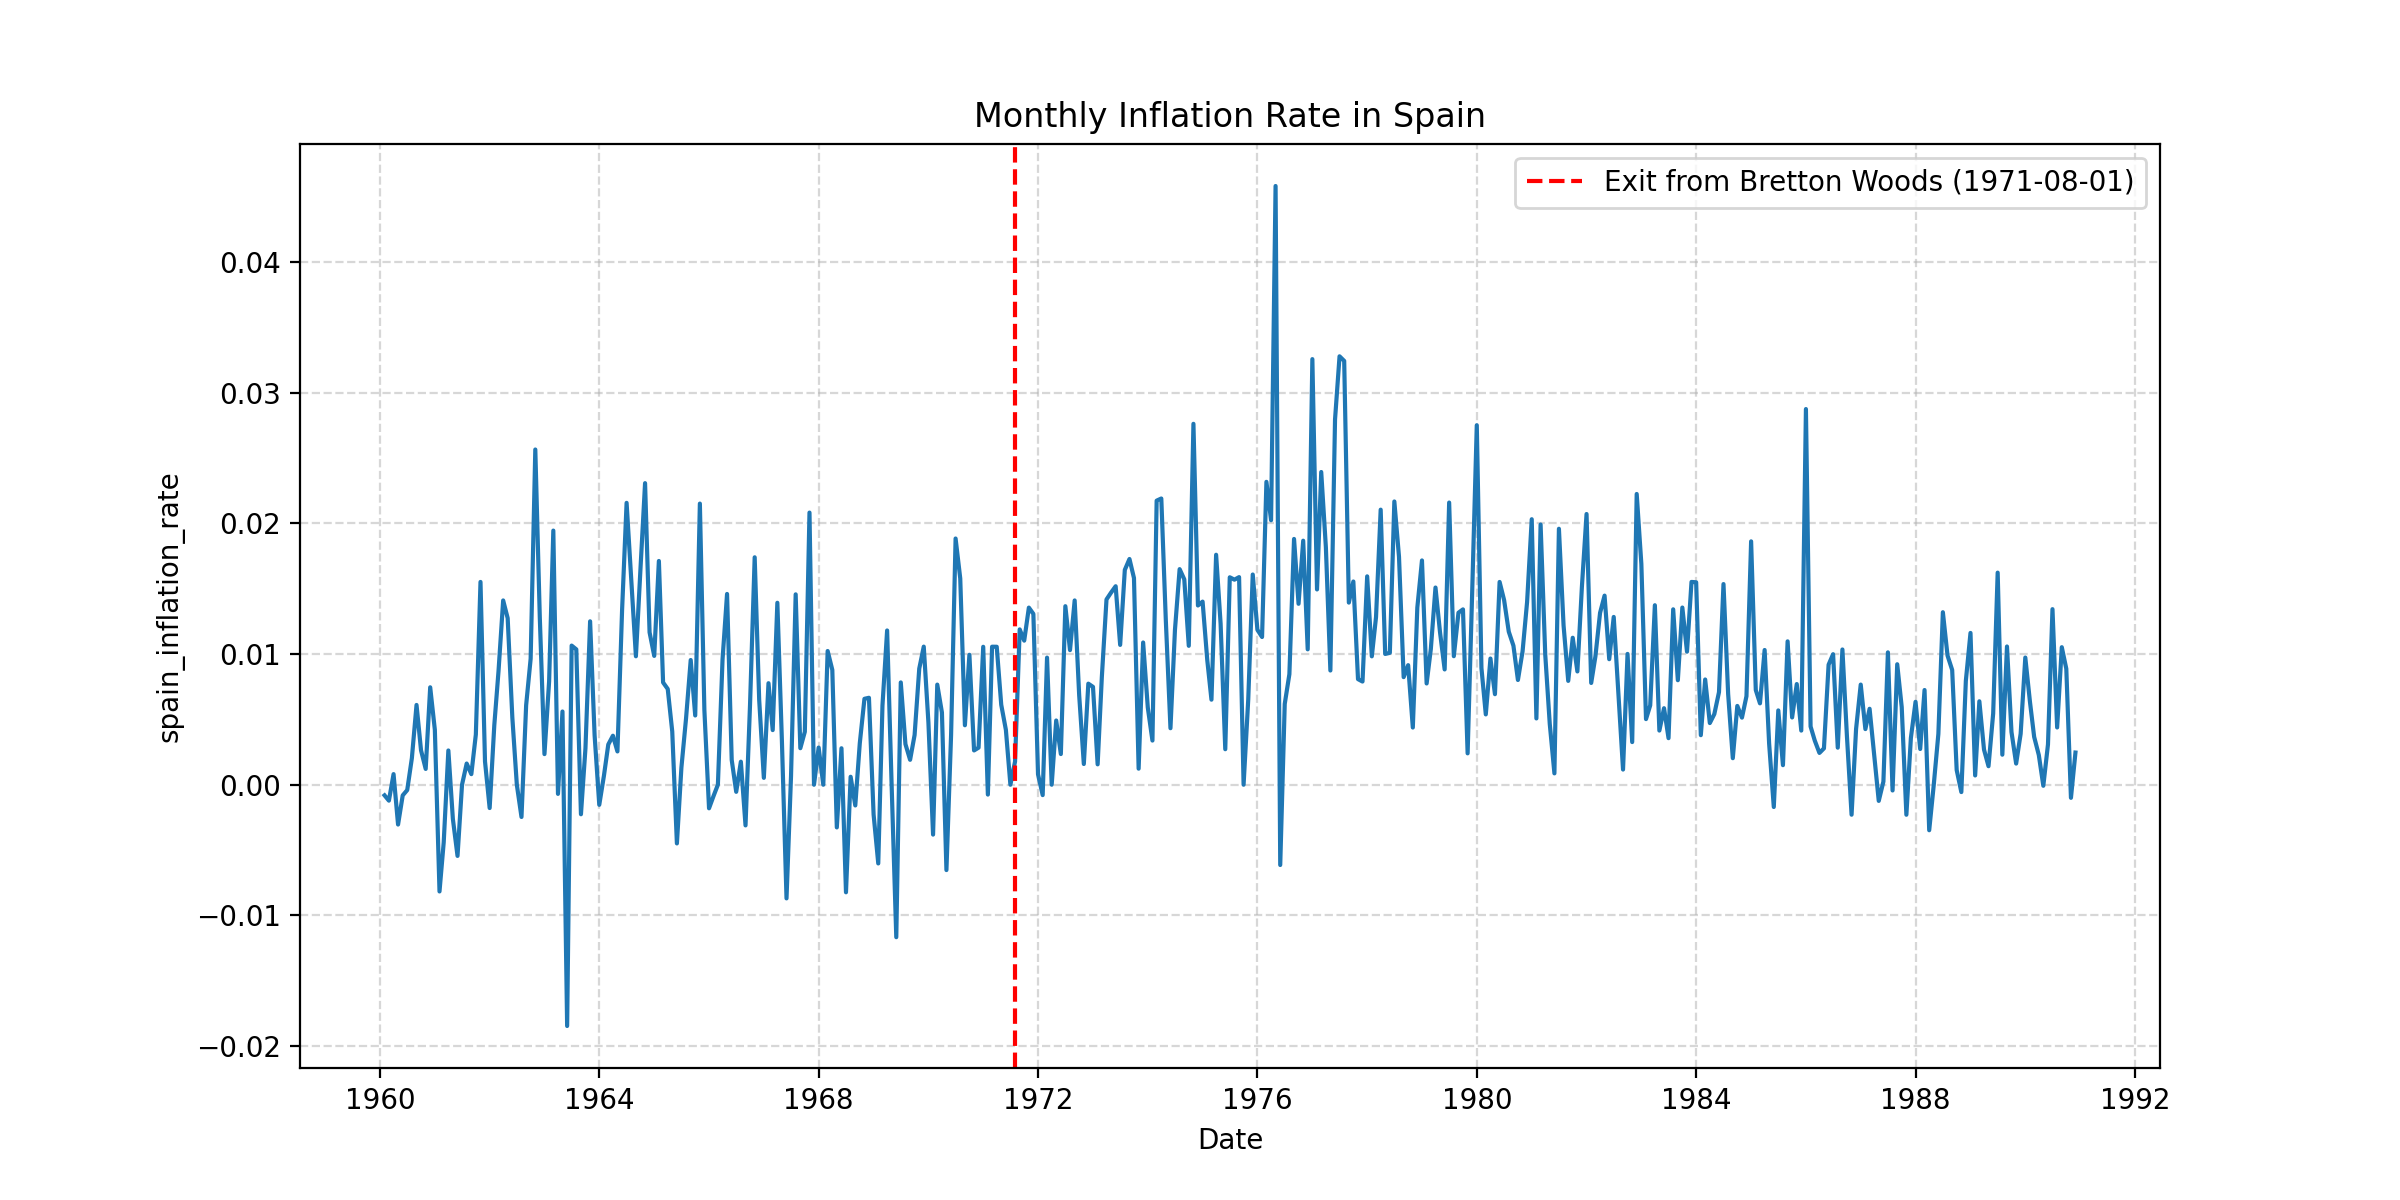

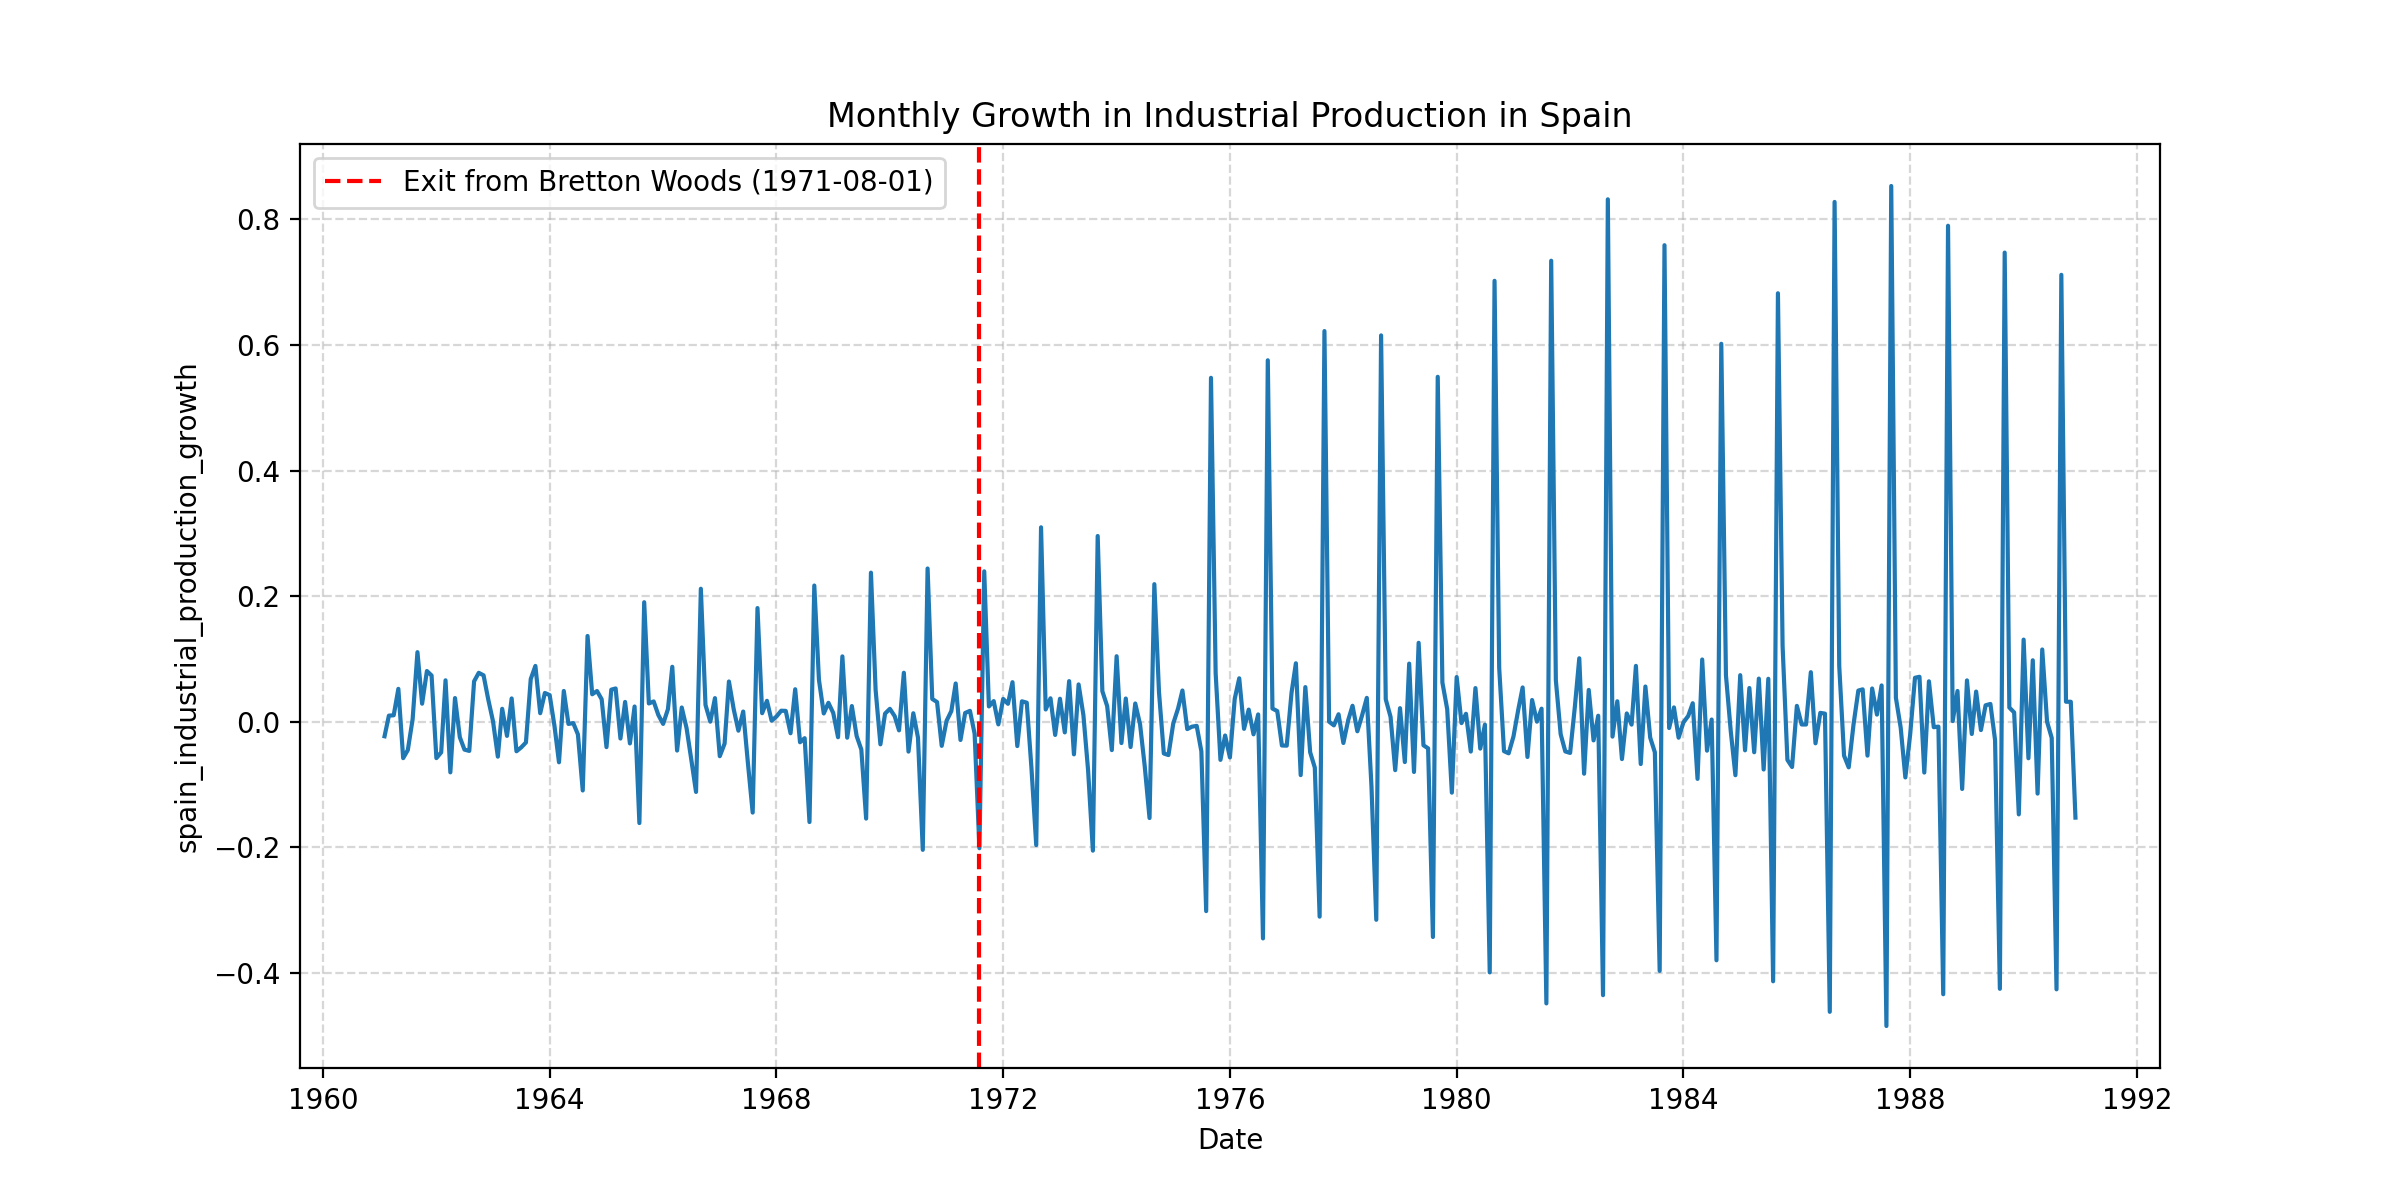

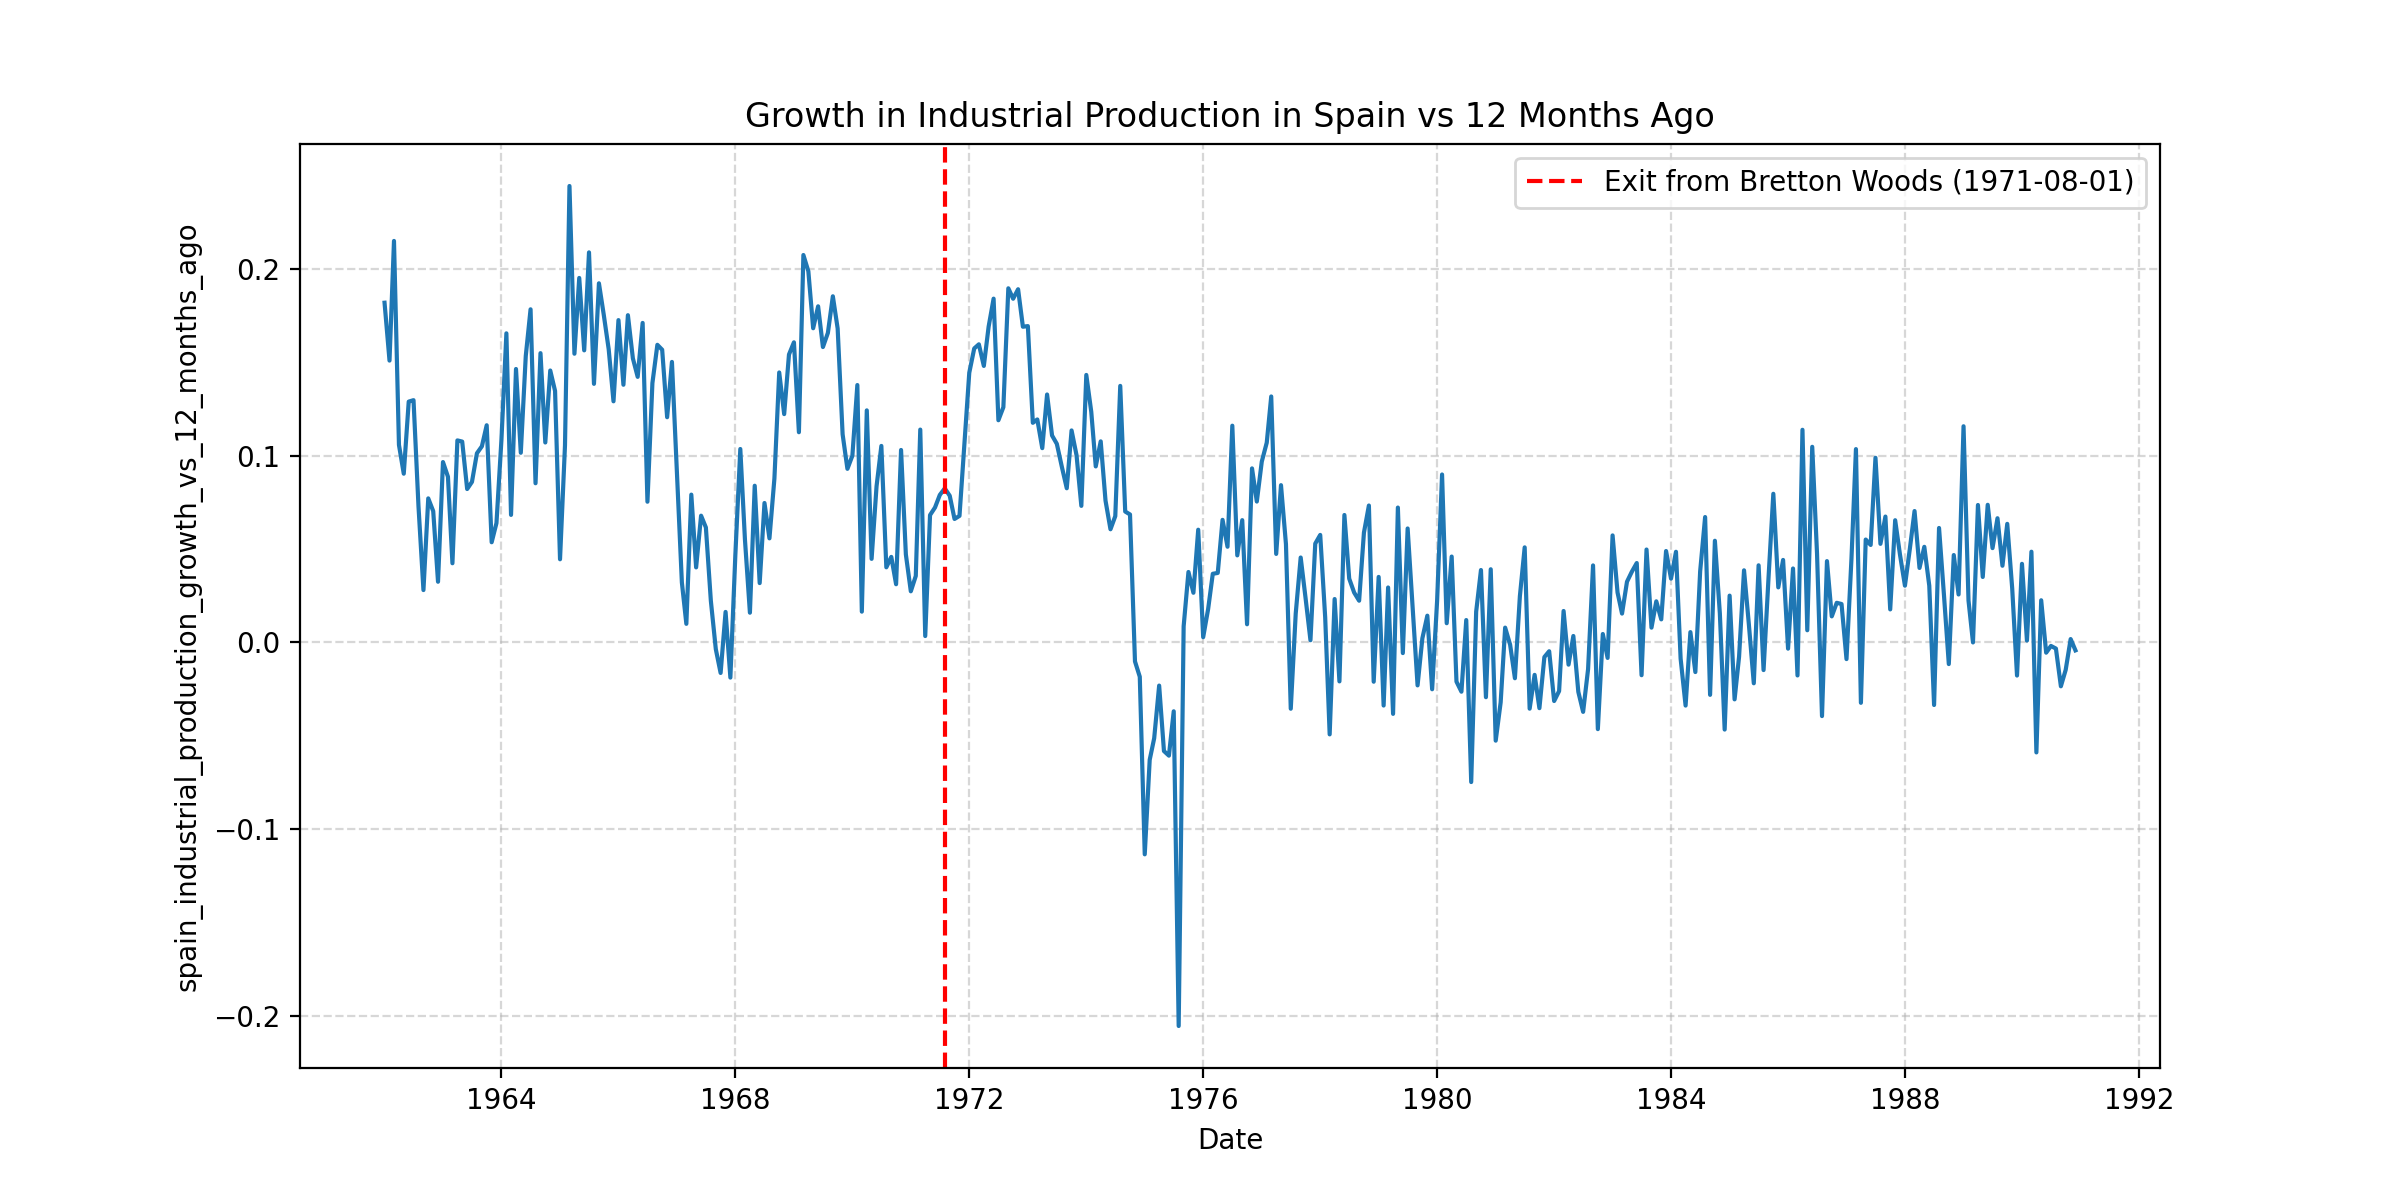

In [175]:
inflation_industrial_production_columns = ['spain_inflation_rate', 'spain_industrial_production_growth', 'spain_industrial_production_growth_vs_12_months_ago']

for col in inflation_industrial_production_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['date'], merged_df[col])
    plt.axvline(pd.to_datetime('1971-08-01'), color='red', linestyle='--', label='Exit from Bretton Woods (1971-08-01)')

    # specify the title of each graph
    if col == 'spain_inflation_rate':
        plt.title('Monthly Inflation Rate in Spain')
    elif col == 'spain_industrial_production_growth':
        plt.title('Monthly Growth in Industrial Production in Spain')
    else:
        plt.title('Growth in Industrial Production in Spain vs 12 Months Ago')

    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.savefig(f'plots/{col}.png', dpi=300)

    plt.show()


### 3.3 Comparison Statistics 

Separately for both the period before and after Bretton Woods, calculate the standard deviation
of:
– The monthly growth of nominal exchange rates versus the US dollar.
– The monthly growth of real exchange rates versus the US dollar.
– The inflation rate in your country.
– The difference between the inflation in your country versus the United States.
– The 12-monthly industrial production growth.

When you calculate the standard deviation of variables before Bretton Woods, include data up to 07/1971. When you calculate the standard deviation of variables after Bretton Woods, only include data from 01/1973.

Report these numbers in a suitably formatted table, as well as the ratio of the standard deviation of each variable before and after Bretton Woods.

Why might it be a good idea to exclude data from 08/1971 to 12/1972 for the above calculations?


In [176]:
# find the difference between the inflation in Spain and the US
merged_df["inflation_diff"] = merged_df['spain_inflation_rate'] - merged_df['us_inflation_rate']
merged_df

,date,spain_industrial_production,spain_exchange_rates_per_USD,spain_international_reserves_liquidity,spain_consumer_prices,us_international_reserves_liquidity,us_consumer_prices,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_production_growth,spain_industrial_production_growth_vs_12_months_ago,spain_international_reserves_liquidity_index,spain_real_exchange_rate_index,us_inflation_rate,us_international_reserves_liquidity_index,inflation_diff
0,1960-01-01,NaN,60.000,233.000000,2.857368,21478.100000,13.436946,NaN,282.153680,NaN,NaN,NaN,NaN,100.000000,1.218834,NaN,100.000000,NaN
1,1960-02-01,NaN,60.000,253.000000,2.855049,21395.700000,13.482806,0.000000,283.346534,0.004228,-0.000811,NaN,NaN,108.583691,1.223987,0.003413,99.616353,-0.004224
2,1960-03-01,NaN,60.000,299.000000,2.851573,21344.700000,13.482806,0.000000,283.691987,0.001219,-0.001218,NaN,NaN,128.326180,1.225479,0.000000,99.378902,-0.001218
3,1960-04-01,NaN,60.000,326.000000,2.853891,21278.000000,13.528666,0.000000,284.425709,0.002586,0.000813,NaN,NaN,139.914163,1.228649,0.003401,99.068353,-0.002588
4,1960-05-01,NaN,60.000,360.000000,2.845198,21234.300000,13.528666,0.000000,285.294743,0.003055,-0.003046,NaN,NaN,154.506438,1.232403,0.000000,98.864890,-0.003046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,57.138375,97.029,53227.717281,52.200576,78908.838357,60.351608,-0.035075,112.179914,-0.030444,0.004383,-0.426276,-0.003284,22844.513855,0.484590,0.009202,367.392080,-0.004820
368,1990-09-01,97.803577,98.467,53790.187718,52.750025,80024.166133,60.856066,0.014820,113.598321,0.012644,0.010526,0.711697,-0.023496,23085.917475,0.490717,0.008359,372.584941,0.002167
369,1990-10-01,100.909947,95.697,55428.040577,53.218335,82852.196532,61.222946,-0.028131,110.090860,-0.030876,0.008878,0.031761,-0.014706,23788.858617,0.475565,0.006029,385.751982,0.002849
370,1990-11-01,104.110449,93.958,56347.862332,53.165017,83059.402774,61.360525,-0.018172,108.441839,-0.014979,-0.001002,0.031716,0.001812,24183.631902,0.468442,0.002247,386.716715,-0.003249


In [177]:
sd_columns = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_inflation_rate', 'inflation_diff', 'spain_industrial_production_growth_vs_12_months_ago']

# filter the dataframe for before and after Bretton Woods periods 
before_bw_df = merged_df[merged_df['date'] <= '1971-07-01']
after_bw_df = merged_df[merged_df['date'] >= '1973-01-01']

# calculate the standard deviation for each column before and after Bretton Woods
before_bw_std = before_bw_df[sd_columns].std()
after_bw_std = after_bw_df[sd_columns].std()

# calculate the ratio of the standard deviation after and before Bretton Woods
std_ratio = after_bw_std / before_bw_std

# create a dataframe to store the standard deviation before and after Bretton Woods and the ratio of the standard deviation
std_df = pd.DataFrame({
    'before_bw_std': before_bw_std,
    'after_bw_std': after_bw_std,
    'std_ratio': std_ratio
})

std_df


,before_bw_std,after_bw_std,std_ratio
spain_nominal_exchange_rate_growth,0.014188,0.025758,1.815514
spain_real_exchange_rate_growth,0.014802,0.025329,1.711221
spain_inflation_rate,0.007231,0.007409,1.024708
inflation_diff,0.007872,0.007479,0.950097
spain_industrial_production_growth_vs_12_months_ago,0.056866,0.050470,0.887534
